# E-commerce: выявление профилей потребителей

**Цель проекта** 

Выявить профили потребителей

**Входные данные** 

Транзакции интернет-магазина товаров для дома и быта "Пока все еще тут".

**Заказчик исследования**

Интернет-магазин товаров для дома и быта "Пока все еще тут"

**Задачи проекта**

* провести исследовательский анализ представленных данных

* выделить товарные категории 

* сегментировать товары на основе принадлежности к той или иной товарной категории

* сегментировать покупателей на основе истории их покупок


**Практическое применение результатов исследования**

Помочь в разработке более персонализированных предложений клиенту. 

<a name='contents'></a>

# Содержание исследования

## [Шаг 1. Загрузка и описание данных](#stage_1)

## [Шаг 2. Обогащение данных](#stage_2)

* Определение товарных категорий

## [Шаг 3. Разведочный анализ данных](#stage_3)

* Количество уникальных покупателей
* Количество уникальных товаров
* Временной интервал представленных данных
* Общая прибыль интернет-магазина за представленный в данных временной интервал
* Топ-10 самых востребованных товаров
* Динамика продаж по месяцам

## [Шаг 4. Создание сводной таблицы с профилями покупателей](#stage_4)

* Добавление числовых показателей и даты последнего заказа
* Добавление количества заказов в каждой категории для каждого покупателя

## [Шаг 5. Исследование профиля потребления](#stage_5)

* Дата последнего заказа
* Общая стоимость всех заказов
* Количество заказов
* Среднее количество позиций в заказе
* Средний чек
* Фильтрация выбросов в данных
* Распределение покупателей по количеству совершенных заказов в каждой товарной категории

## [Шаг 6. Кластеризация клиентов с помощью ML](#stage_6)

* Матрица корреляций признаков
* Дендограмма
* Обучение модели K-Means
* Вычисление средних значений признаков для каждого кластера клиентов

## [Шаг 7. Проверка статистических гипотез](#stage_7)

* Проверка гипотез о средних чеках в двух группах: у клиентов в оттоке и клиентов, которые совершали заказы на протяжении всего готова

## [Шаг 8. Общий вывод и рекомендации](#stage_8)

## [Шаг 9. Ссылки на презентацию и дашборд](#stage_9)


<a name='stage_1'></a>
# Шаг 1. Загрузка и описание данных
[Назад к оглавлению](#contents)

Установка библиотек для NLP-анализа

In [1]:
!pip install nltk
!pip install pymorphy2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy import stats
import pymorphy2
import urllib
morph = pymorphy2.MorphAnalyzer() #сразу же инициализируем морфанализатор
import re
import requests
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")

Загрузка и чтение файла.

In [3]:
url = 'https://drive.google.com/file/d/1G1LbnpaG65K0tBSR5alsG06mD53MydVS/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path) 

Смотрим на данные: ссылка на переменную покажет и голову и хвост.

In [4]:
df

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


## Описание данных согласно документации

* date — дата заказа;

* customer_id — идентификатор покупателя;

* order_id — идентификатор заказа;

* product — наименование товара;

* quantity — количество товара в заказе;

* price — цена товара.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Cохраним кол-во строк в исходном датафрейме

In [6]:
orig_shape = df.shape[0]
f'Количество строк в исходном датасете: {orig_shape}'

'Количество строк в исходном датасете: 6737'

In [7]:
df.isna().mean()

date           0.0
customer_id    0.0
order_id       0.0
product        0.0
quantity       0.0
price          0.0
dtype: float64

Пропущенных знаечений нет. 

Наименования колонок соответствует формату. 

Тип данных в столбце date требует коррекции.

In [8]:
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d%H%M')

Проверяем результат

In [9]:
df['date']

0      2018-10-01 00:00:00
1      2018-10-01 00:00:00
2      2018-10-01 00:00:00
3      2018-10-01 00:00:00
4      2018-10-01 00:00:00
               ...        
6732   2019-10-31 01:01:00
6733   2019-10-31 01:02:00
6734   2019-10-31 01:03:00
6735   2019-10-31 01:04:00
6736   2019-10-31 01:06:00
Name: date, Length: 6737, dtype: datetime64[ns]

Поскольку у нас есть текстовый столбец - с названием товара, проведем базовую предбработку названий: уберем букву 'ё', возможные лишние пробелы.

In [10]:
df['product'] = df['product'].replace({'ё': 'е', 'Ё': 'Е',' {2,}': ' '}, regex=True)\
                             .str.strip()

## Работа с дубликатами

Проверим, есть ли явные дубликаты.

In [11]:
print('Количество явных дубликатов:', df.duplicated().sum())

Количество явных дубликатов: 0


Посмотрим на количество уникальных заказов.

In [12]:
f"Количество уникальных заказов: {len(df['order_id'].unique())}"

'Количество уникальных заказов: 2784'

In [13]:
f"Количество заказов c одинаковым id: {df.shape[0]-len(df['order_id'].unique())}"

'Количество заказов c одинаковым id: 3953'

Посмотрим более внимательно на заказы с одинаковым id, сделанные одним и тем же клиентом.

In [14]:
df.query('order_id == 68611')

,date,customer_id,order_id,product,quantity,price
211,2018-10-11 01:04:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0
212,2018-10-11 01:04:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0
266,2018-10-16 00:08:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0
267,2018-10-16 00:08:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0


In [15]:
df[df.duplicated(subset = ['customer_id', 'order_id', 'product', 'quantity', 'price'], \
                 keep=False)]

,date,customer_id,order_id,product,quantity,price
15,2018-10-01 01:08:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарн...",1,239.0
16,2018-10-01 01:08:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытие...,1,824.0
17,2018-10-01 01:08:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см...,1,262.0
18,2018-10-01 01:08:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0
19,2018-10-01 02:01:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
...,...,...,...,...,...,...
6716,2019-10-30 00:07:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0
6717,2019-10-30 00:09:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0
6729,2019-10-31 00:02:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


То есть клиент в одном заказе покупает разные позиции и все они проходят под одним id заказа (тут все логично), но мы видим, что есть такие заказы (к примеру, 73136), где покупается один и тот же товар одним и тем же клиентом, в одном и том же количестве, по одной и той же цене, под одним id заказа, но при этом в разное время. Это похоже на задублированные заказы. Если их оставить, то это может исказить данные нашего исследования. Отфильтруем такие заказы.

Уберем параметр keep=False, только первая запись будет считаться уникальной, а все остальные одинаковые будут считаться дубликатами.

In [16]:
"Процент задублированных заказов: {:.1%}".format(\
    len(df[df.duplicated(subset=['customer_id','order_id', 'product', 'quantity', 'price'])])
                                                 / df.shape[0]
                                                )

'Процент задублированных заказов: 27.7%'

In [17]:
f"Количество строк в датасете с задублированными заказами: {len(df[df.duplicated(subset = ['customer_id', 'order_id', 'product', 'quantity', 'price'])])}"

'Количество строк в датасете с задублированными заказами: 1864'

Будем считать актуальным тот заказ, который был совершен самым последним по дате.

Удаляем из нашего датасета строки с одинаковыми customer_id, order_id, product, 'quantity', 'price' и оставляем только самую последнюю строку-дубли

In [18]:
df = df.sort_values(by='date')\
.drop_duplicates(subset = ['customer_id', 'order_id', 'product', 'quantity', 'price'],\
                 keep='last')

In [19]:
f"Мы отрезали {1-len(df)/orig_shape:.1%} данных"

'Мы отрезали 27.7% данных'

Все сходится. 

Проверим ранее задублированный заказ 73136.

In [20]:
df.query('order_id==73136')

,date,customer_id,order_id,product,quantity,price
6729,2019-10-31 00:02:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


Все в порядке: остался только самый поздний по дате заказ пластмассового таза со стиральной доской.

Теперь еще посмотрим на строки, где одинаковые айдишники заказа и купленные товары.

In [21]:
df[df.duplicated(subset=['order_id', 'product', 'price', 'quantity'], keep=False)]

,date,customer_id,order_id,product,quantity,price
512,2018-10-28 02:02:00,0b5ce2c7-acef-4a9a-b821-61a44ed05557,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0
538,2018-10-30 02:01:00,c1dd5c0e-51db-4a5d-91a3-5374cb20043d,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0
1154,2018-12-10 01:02:00,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0
1160,2018-12-10 01:06:00,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0
1196,2018-12-13 01:09:00,70d60304-4b3c-4f34-9430-1872ec6e6309,69345,Сушилка для белья Attribute ПРИМА 18 м синяя A...,1,974.0
...,...,...,...,...,...,...
6508,2019-10-04 00:08:00,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
6538,2019-10-07 02:00:00,2ac05362-3ca7-4d19-899c-7ba266902611,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
6576,2019-10-10 02:02:00,31a39955-8a93-42f3-8839-04a9693632a7,72778,Шеффлера Голд Капелла d-12 см h-25 см,1,149.0
6601,2019-10-13 01:05:00,b1dbc7c4-3c84-40a7-80c9-46e2f79d24ad,72950,Кастрюля эмалированная Стэма С-1624 12 л цилин...,1,974.0


In [22]:
f"Процент одинаковых заказов c одинаковым айди у разных пользователей {len(df[df.duplicated(subset=['order_id', 'product', 'quantity', 'price'])])/df.shape[0]:.1%}"


'Процент одинаковых заказов c одинаковым айди у разных пользователей 0.7%'

Один и тот же заказ, сделанный разными пользователями. Это, похоже, на ошибку. Удалим их все из нашего датасета. 

In [23]:
df = df.drop_duplicates(subset=['order_id', 'product', 'quantity', 'price'], keep=False)

Проверим заказ 68785 с дублем у другого клиента:

In [24]:
df.query('order_id==68785')

,date,customer_id,order_id,product,quantity,price


Посмотрим, как выглядит датасет после удаления задублированных заказов.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4810 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4810 non-null   datetime64[ns]
 1   customer_id  4810 non-null   object        
 2   order_id     4810 non-null   int64         
 3   product      4810 non-null   object        
 4   quantity     4810 non-null   int64         
 5   price        4810 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 263.0+ KB


In [26]:
f"Количество строк в датасете после предобработки: {df.shape[0]}"

'Количество строк в датасете после предобработки: 4810'

<a name='stage_2'></a>
# Шаг 2. Обогащение данных
[Назад к оглавлению](#contents)

Добавим отдельный столбец с месяцем.

In [27]:
df['month'] = df['date'].values.astype('datetime64[M]')

Вычислим сумму заказа - запишем в отдельный столбец revenue.

In [28]:
df['total_price'] = df['quantity'] * df['price']

Посмотрим, что у нас в итоге получилось.

In [29]:
df.sample(5)

,date,customer_id,order_id,product,quantity,price,month,total_price
2255,2019-03-09 00:09:00,1a32c1a4-5862-4896-8671-fa4c1ffcf0c4,70666,"Сумка-тележка TWIN стальной каркас 56 л серая,...",1,2549.0,2019-03-01,2549.0
2952,2019-04-19 01:06:00,5f6d318b-4ed0-4163-8767-2959bc2e6c76,14663,"Рассада зелени для кухни Базилик Арарат, кассе...",1,169.0,2019-04-01,169.0
6372,2019-09-21 01:02:00,ae036d1b-b1d5-41e4-8c85-d2bd1b0b4e18,72710,Пеларгония зональная Ринго Вайт d-7 см h-10 см...,1,74.0,2019-09-01,74.0
3039,2019-04-23 01:00:00,060d95a3-3771-4aa5-9fdc-34a0b301fff7,71244,Вешалка с закругленными плечиками перекладиной...,8,86.0,2019-04-01,688.0
734,2018-11-10 01:00:00,5bc532d4-a705-4004-b6be-028274cfb764,68935,Штора для ванной комнаты Diamante 240х200 см б...,1,1199.0,2018-11-01,1199.0


In [30]:
df.shape

(4810, 8)

## Определение товарных категорий

In [31]:
""" Функция для предобработки и токенизации текста:

Функция очищает строку от знаков препинания, токенизирует (разбивает на слова) с помощью токенизатора из библиотеки nltk,
убирает стоп-слова, слова, проверяет, есть ли в слове смесь букв из кириллицы и латиницы, если да - заменяет латинские буквы на кириллические
и оставляет в списке только слова с буквами русского алфавита и дефисом, где не меньше 3 символа. 

Аргументы:
    text - строка 
    
Вывод:
    good_tokens - список слов 
"""
def preprocessing(text):
    # удаляем пунктуацию
    text = re.sub(r'[!\"#$%&\'()*+,./:;<=>?@^_`{|}~]|( -)|(\[)|(\])', '', text)
    tokens =  word_tokenize(text)
    good_tokens = []
    for token in tokens:
        # убираем стоп-слова и оставляем только слова, 
        #в которых кириллические буквы и больше 3
        if token not in stopwords.words('russian') and re.fullmatch(r'[ABCEHKMOPTXacpmeoxy-]+[а-яА-Я]{2,}', token) is not None:
            #заменяем латинские буквы на кириллические (Tepмокружка)
            token = token.translate(str.maketrans('ABCEHKMOPTXacpmeoxy','АВСЕНКМОРТХасрмеоху'))
            good_tokens.append(token)
        elif token not in stopwords.words('russian') and re.fullmatch(r'[а-яА-Я-]{3,}', token) is not None:
            good_tokens.append(token)
    return good_tokens

In [32]:
"""
Функция для лемматизации текста:

Функция берет на вход строку, предобрабатывает ее с помощью встроенной функции preprocessing и возвращает только имена существительные 
в начальной форме, склеенные в строку через пробел. Для лемматизации и морфологического анализа используется библиотека pymorphy.

Аргументы:
    text - строка с текстом 
    
Вывод:
    key_lemmas - строка со словами в начальной форме. 

"""
def lemmatize_text(text):
    lemmas = []
    tokens = preprocessing(text)
    #print(tokens)
    for token in tokens:
        morph_analized = morph.parse(token) # морф анализ
        #print(morph_analized[0].word)
        if morph_analized[0].word == 'мята': #затычка для "мяты" (у pymorphy выигрывает разбор через прилагательное мятый)
            lemmas.append('мята')
        elif morph_analized[0].word == 'гвоздика': #затычка для "гвоздики" (у pymorphy выигрывает разбор через существительное "гвоздик")
            lemmas.append('гвоздика')
        elif morph_analized[0].word == 'петля': # иначе выигрывает анализ через "петлить"
            lemmas.append('петля')
        elif morph_analized[0].word == 'сверел':
            lemmas.append('сверло')
        elif morph_analized[0].word == 'космея':
            lemmas.append('космея')
        elif morph_analized[0].word == 'совок':
             lemmas.append('совок')
        else:
            lemmas.append(morph_analized[0].normal_form) #извлекаем лемму-начальную форму слова
    #склеиваем список в строку, разделяя леммы пробелом
    key_lemmas = ' '.join(lemmas).strip()        
    return key_lemmas

In [33]:
%time
df['product_lemmas'] = df['product'].apply(lemmatize_text)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs


In [34]:
df.head()

,date,customer_id,order_id,product,quantity,price,month,total_price,product_lemmas
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,142.0,комнатный растение горшок алый вера
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,194.0,комнатный растение горшок кофе арабика
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,112.0,радермахер
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,179.0,хризолидокарпус лутесценс
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,112.0,циперус зумул


Посмотрим на самые встречаемые сочетания лемм с помощью value_counts.

In [35]:
df['product_lemmas'].value_counts().sort_values(ascending=False)

пеларгония розебудный укоренить черенок             226
сумка-тележка колёсный синий                         57
пеларгония зональный диам сиреневый полумахровый     52
сумка-тележка хозяйственный синий                    45
сушилка бельё потолочный лиана                       45
                                                   ... 
лавр                                                  1
чайник заварочный металлический фильтр                1
каланхий каландив малиновый                           1
салатник карин гранит франция                         1
литопс микс                                           1
Name: product_lemmas, Length: 1984, dtype: int64

Отдельно создадим список с ключевыми словами - возьмем только первые в названии, если это не набор. 

In [36]:
key_wrds = []
for elem in df['product_lemmas'].unique().tolist():
    if elem.split()[0] == 'набор': # если набор, нужно смотреть его состав
        if elem.split()[1] in key_wrds:
            
            continue
        else:
            key_wrds.append(elem.split()[1])
    else:
        if elem.split()[0] in key_wrds:
            continue
        else:
            key_wrds.append(elem.split()[0])
print('Длина списка с ключевыми словами (существительные и прилагательные):', len(key_wrds))

Длина списка с ключевыми словами (существительные и прилагательные): 449


Посмотрим на список. Он длинный. Для отладки я смотрела на весь, для показа тетрадки - ограничим вывод до 10 элементов.

In [37]:
key_wrds[:10]

['комнатный',
 'радермахер',
 'хризолидокарпус',
 'циперус',
 'шеффлера',
 'юкка',
 'таз',
 'настенный',
 'чехол',
 'вешалка']

Попробуем убрать прилагательные из этого списка и отсортируем в алфавитном порядке.

In [38]:
for elem in key_wrds:
    #убираем прилагательные
    if elem.endswith(('ый', 'ий')):
        key_wrds.remove(elem)
print('Длина списка с ключевыми словами (только существительными):', len(key_wrds))
sorted(key_wrds)[:10]

Длина списка с ключевыми словами (только существительными): 405


['агератум',
 'адиантум',
 'азалия',
 'аквилегия',
 'алиссума',
 'алоэ',
 'альбук',
 'амариллис',
 'анемон',
 'антижир']

Отсортируем в алфавитном порядке уникальные значения столбца product_lemmas.

In [39]:
sorted(df['product_lemmas'].unique().tolist())[:10]

['автоматический щётка мытьё окно ручка',
 'агератум рассада однолетний цвет кассета',
 'адиантум лиза',
 'азалия индик биколор',
 'азалия индик розовый',
 'азалия индик фиолетовый',
 'аквилегия махровый тауэр смесь окраска объём',
 'аквилегия обыкновенный барлоу микс объём',
 'алиссума лобулярия снежный одежда',
 'алиссума рассада однолетний цвет кассета']

На основе всех этих списков попробуем вручную создать словарь с категориями товаров.

Тестовая ячейка для проверки, работы с текстом

In [40]:
df[df['product_lemmas'].str.contains(r'чехол хлопок')].head()

,date,customer_id,order_id,product,quantity,price,month,total_price,product_lemmas
12,2018-10-01 01:03:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68485,Чехол Eurogold Clean Basic хлопок для досок 12...,1,187.0,2018-10-01,187.0,чехол хлопок доска
1087,2018-12-03 01:02:00,4c012ce2-d9fa-402b-b07b-9a9a5e405c44,69184,Чехол Eurogold Clean Basic хлопок для досок 12...,1,187.0,2018-12-01,187.0,чехол хлопок доска
2977,2019-04-20 01:04:00,1a44dab1-2a18-4c95-83a1-b64e4e883f5f,71211,Чехол Eurogold Clean Basic хлопок для досок 12...,1,187.0,2019-04-01,187.0,чехол хлопок доска
3189,2019-04-26 01:04:00,8f00cdbf-0de2-4bad-a84f-e437ba684f30,71294,"Чехол Eurogold Clean Premium хлопок, поролон, ...",1,217.0,2019-04-01,217.0,чехол хлопок поролон доска


### Словарь категорий товаров

Создадим словарь словарных категорий на основе тех списков слов, что мы выделили выше. 

Ключ словаря - товарная категория.
Значения словаря - список лемм, характерных для этой категории.

In [41]:
product_cats = {'plants_seeds': [
    'ампельный',
    'вечноцветущий',
    'зональный',
    'комнатный',
    'лекарственный',
    'многолетний',
    'низкорослый',
    'однолетний',
    'позднеспелый',
    'почвопокровный',
    'плющелистный',
    'раннеспелый',
    'скороспелый',
    'среднеспелый',
    'розебудный',
    'микс объём',
    'растение',
    'черенок',
    'кассета',
    'кустовой',
    'рассада',
    'горшок',
    'чашелист',
    'чайногибридный',
    'одноголовый',
    'очиток',
    'подвесной кашпо',
    'азалия',
    'агератум',
    'адиантум',
    'аквилегия',
    'аллисума',
    'алоэ вера',
    'альбук',
    'амариллис',
    'анемон',
    'алиссума',
    'арбуз волгоградец',
    'арбуз огонёк',
    'арбуз сибирский',
    'арбуз холодок',
    'арбуз шуга бейбить',
    'антуриум',
    'аптения',
    'артемизия',
    'аспарагус',
    'афеляндр',
    'бадан',
    'базилик',
    'баклажан самурай',
    'бальзамин',
    'бакоп',
    'барвинок',
    'бархатцы',
    'бегония',
    'буддлей',
    'бузульник',
    'валериан',
    'вербейник',
    'вербена',
    'вероника',
    'виола',
    'высокорослый',
    'гардения',
    'газаний',
    'гайлардия',
    'гвоздика',
    'георгин',
    'герань', 
    'гербер',
    'гиацинт',
    'гимнокалициум',
    'гиностемма',
    'гипсофил',
    'глоксиния',
    'годеция',
    'горох',
    'гортензия', 
    'девичий виноград',
    'декабрист горшок',
    'дендробиум',
    'драцена',
    'душица',
    'дыня алтайский',
    'дыня дин',
    'дыня золотой',
    'дыня колхозница',
    'дыня медовый',
    'дыня млада',
    'дыня награда',
    'дыня симпатия',
    'ель канадский', 
    'ель сербский',
    'джункус',
    'диффенбахий',
    'замиокулькас',
    'зверобой',
    'земляника',
    'змееголовник',
    'импатиенс',
    'иссоп',
    'кабачок',
    'каланхий',
    'калатея',
    'календула',
    'калибрахоа',
    'калла',
    'каллуна',
    'калоцефалус',
    'камнеломка',
    'кампанула',
    'капсикума',
    'капуста', 
    'кассета',
    'кипарисовик',
    'клён',
    'квадро цвет венга',
    'кипарисовик',
    'клубника альба',
    'клубника мара',
    'клубника хонь',
    'колокольчик',
    'крассула',
    'космея ', # затычка, чтобы не ловить таз "Космея"
    'кореопсис',
    'котовник',
    'кореопсис',
    'кофе ',  # затычка, чтобы не ловить в "кофейный"
    'лобелия',
    'луковица',
    'лаванда',
    'лаватер',
    'лавр',
    'лантан',
    'лапчатка',
    'лен небесный',
    'лобулярия',
    'литопс',
    'мединилла',
    'мята',
    'мирт',
    'мимоза',
    'морковь детский',
    'молодило',
    'муррайя',
    'монард',
    'нолин',
    'незабудка',
    'нефролепис',
    'настурция',
    'нивянник',
    'овсянница',
    'огурец засолочный',
    'осина',
    'пеларгония',
    'петуния',
    'петрушка',
    'пиретрум',
    'портулак',
    'примула',
    'пряный трава',
    'пуансетие',
    'пуансеттие',
    'папоротник',
    'платикодон',
    'пахир',
    'пеперомия',
    'радермахер', 
    'роза мини',
    'роза корда',
    'роза патио',
    'роза мин',
    'роза палас',
    'розмарин',
    'ранункулус',
    'рудбекия',
    'суккулента',
    'сантолина',
    'салат рукол',
    'спатифиллум',
    'соланум',
    'солидаго',
    'скиммия',
    'спатифиллум',
    'смолёвка',
    'сорт ', #затычка чтобы не цеплять "ассортимент"
    'тимьян',
    'томат помидор',
    'тюльпан',
    'томат балконный',
    'хризолидокарпус', 
    'хризантема',
    'чабёр',
    'циперус',
    'цикламен',
    'цинерария',
    'цинния',
    'цитрофортунелла',
    'укроп',
    'шеффлера',
    'фиалка',
    'флокс',
    'фиттония',
    'фикус',
    'фаленопсис',
    'фатсия',
    'физостегия',
    'хамедорей',
    'хлорофитум',
    'хризантема',
    'эхеверие',
    'эхинокактус',
    'эвкалипт',
    'эшшольция',
    'эпипремнум',
    'эпипремнум',
    'энотера',
    'эхинокактус',
    'юкка',
    'ясколка',
    'чабёр'],
             
'kitchen': [
    'вилка',
    'венчик',
    'выпечка',
    'ёмкость',
    'зажигалка',
    'нож',
    'банк',
    'блюдо',
    'блюдце',
    'бульонница',
    'бокал',
    'доска разделочный',
    'измельчитель',
    'картофелемялка',
    'кастрюля',
    'кипятильник',
    'кисточка',
    'ковш',
    'коврик сушка',
    'кувшин',
    'кружка',
    'кухонный',
    'крышка',
    'кондитерский',
    'кекс',
    'лопатка',
    'лоток',
    'ложка столовая',
    'мантоварка',
    'маслёнка',
    'миксер',
    'миска',
    'ножеточка',
    'набор столовый',
    'овощерезка',
    'овощечистка',
    'овощеварка',
    'орехоколка',
    'отделитель',
    'противень',
    'пресс чеснок',
    'пикник',
    'половник',
    'посуда',
    'подставка',
    'просеиватель',
    'разделочный доска',
    'рассекатель',
    'рыбочистка',
    'сковорода',
    'cтоловый',
    'соковыжималка',
    'стакан',
    'салатник',
    'салфетка',
    'салфетница',
    'сахарница',
    'сито',
    'скалка',
    'столовая',
    'соковарка',
    'сотейник',
    'тортница',
    'тарелка',
    'толкушка',
    'тёрка',
    'термос',
    'фужер',
    'штопор',
    'экран',
    'чайный',
    'чайник',
    'хлебница',
    'яйцо'

],
'bathroom_wc': [
    'ванна',
    'ванная',
    'вантуз',
    'дозатор',
    'держатель туалетный',
    'ёрш',
    'карниз',
    'подголовник',
    'штора'
],

'cleaning_washing': [
    'антижир',
    'антинакипин',
    'бак',
    'биопорошок',
    'ведро',
    'веник',
    'гель',
    'губка',
    'гладильный',
    'зубной паста',
    'кондиционер',
    'концентрат',
    'микрофибра',
    'мыло',
    'мытьё',
    'мойка',
    'ополаскиватель', 
    'отбеливатель',
    'отжим',
    'паста зубной',
    'подкладка',
    'пена',
    'перчатка',
    'прищепка',
    'ролик',
    'соль',
    'смётка',
    'совок',
    'скребок',
    'сетка глажение',
    'сушилка',
    'средство',
    'сетка стирка',
    'таз', 
    'тряпкодержатель',
    'утюг',
    'чехол гладильный',
    'чехол хлопок',
    'поролон доска',
    'подрукавник',
    'чистить',
    'чистка',
    'щётка',
    'швабра',
    
],

'home_linen':[
    'наволочка',
    'наматрасник',
    'наматрацник',
    'наматрицник-чехол',
    'одеяло',
    'подушка',
    'покрывало',
    'полотенце',
    'простыня',
    'постельный бельё',
    'пододеяльник',
    'плед',
    'скатерть',
    'халат'
],
                

'storage': [
    'бидон',
    'вешалка',
    'вешалка-плечики',
    'вкладыш',
    'крючок',
    'ключница',
    'корзина',
    'коробка',
    'комод',
    'контейнер',
    'котёл',
    'короб',
    'кофр',
    'корыто',
    'мешок',
    'урна',
    'пакет хранение',
    'плечики',
    'полка',
    'подставка обувь',
    'ручка мебельный',
    'стеллаж',
    'чехол одежда',
    'чехол платье',
    'чехол костюм',
    'чехол короткий',
    'этажерка',
    'ящик'

],

'bags_carts': [
    'сумка',
    'тележка'
],

'home_decor': [
    'муляж',
    'коврик',
    'ковёр',
    'ваза',
    'весы',
    'декоративный композиция',
    'искусственный цвет',
    'искусственный композиция',
    'цветок искусственный',
    'искусственный лиана',
    'пуф',
    'светильник',
    'термометр',
    'ложка обувной',
    'фоторамка',
],
 
'renovation': [
    'верёвка',
    'завёртка',
    'крепёж',
    'насадка',
    'напильник',
    'пружина',
    'пробка электрический',
    'петля',
    'паста полировка',
    'стяжка',
    'сверло',
    'сверло-фреза',
    'инструмент',
    'набор сверло',
    'решётка вентиляционный',
    'ручка-скоба',
    'сварка',
    'стремянка',
    'лестница-стремянка',
    'линейка',
    'угольник',
    'уголок оконный',
    'фиксатор-шар',
    'фал капроновый',
    'шило',
    'шнур',
    'шпагат',
    'шпингалет',
    'штангенциркуль'
]              
}

### Функция для категоризации товаров

In [42]:
"""
Функция на вход принимает строку,
в цикле перебирает ключи и значения словаря с продуктовыми категориями. 
Если значение из словаря найдено в строке, 
функция возвращает ключ - категорию товара и цикл прерывается.


Аргументы:
    string - строка 
    
Вывод:
    key - строка (ключ словаря)

"""
def categorize_products(string):
    for key,value in product_cats.items():
            for elem in value:
                if elem in string:
                    return key
                    break               

In [43]:
for key,value in product_cats.items():
    for elem in value:
        if elem in 'наматрицник-чехол стебель бамбук односпальный':
            print(elem)
            break    

наматрицник-чехол


In [44]:
df['product_category'] = df['product_lemmas'].apply(categorize_products)

Посмотрим на случайной выборке из 10 записей, что у нас получилось. 

In [45]:
df.sample(10)

,date,customer_id,order_id,product,quantity,price,month,total_price,product_lemmas,product_category
1922,2019-02-20 01:05:00,d220a441-2ed1-428e-8f3f-966beb50bd0e,70373,Герань домашняя (пеларгония зональная) цветуща...,2,157.0,2019-02-01,314.0,герань домашний пеларгония зональный цветущий ...,plants_seeds
2163,2019-03-04 01:05:00,0f47231c-3a68-404a-88f7-08a4a172c17f,14559,Рассада зелени для кухни Розмарин Блю Лагун ди...,1,119.0,2019-03-01,119.0,рассада зелень кухня розмарин блю лагуна диам,plants_seeds
1855,2019-02-16 01:09:00,3a9f0783-9f8a-45a3-a535-cf8d7cfaaa7a,70293,Зубная паста Systema Tartar против образования...,1,194.0,2019-02-01,194.0,зубной паста против образование зубной камень ...,cleaning_washing
31,2018-10-02 01:01:00,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,Муляж Зеленое яблоко полиуретан d-6 см,1,22.0,2018-10-01,22.0,муляж зелёный яблоко полиуретан,home_decor
645,2018-11-05 01:09:00,d96d868e-6398-4fa2-a963-39359d441128,68863,Сумка-тележка 2-х колесная складная Gimi Flexi...,1,1649.0,2018-11-01,1649.0,сумка-тележка колёсный складный серый,bags_carts
1228,2018-12-17 00:09:00,db5c1840-bdb7-4f2f-8239-2ab779fd9706,69399,Мыльница пластмассовая на ванну М2221 1702010,1,89.0,2018-12-01,89.0,мыльница пластмассовый ванна,bathroom_wc
386,2018-10-23 01:06:00,53b4e70a-152d-49ad-9a27-904c98fb9771,66760,Салфетка Protec Textil Polyline 30х43 см Амети...,2,209.0,2018-10-01,418.0,салфетка аметист белый,kitchen
6604,2019-10-13 02:03:00,923c1f96-6a15-48aa-ab64-6a92fb2440c0,72953,"Муляж Перец Чили в связке, красный, 60 см, пол...",1,187.0,2019-10-01,187.0,муляж перец чили связка красный полиуретан,home_decor
2561,2019-03-30 00:09:00,068d0b82-44d7-4972-9696-1f9c84983512,70925,Скатерть Dasch Донна Роза из ПВХ 0401-2 Розы к...,1,442.0,2019-03-01,442.0,скатерть донна роза пвх роза круглый,home_linen
2327,2019-03-14 01:00:00,3f8fc872-6d4e-4f78-9af6-e8ae519b4e35,14570,Пеларгония розебудная Red Pandora укорененный ...,1,135.0,2019-03-01,135.0,пеларгония розебудный укоренить черенок,plants_seeds


Проверим пропуски в столбце с категорией товаров.

In [46]:
df[df['product_category'].isna()]

,date,customer_id,order_id,product,quantity,price,month,total_price,product_lemmas,product_category
888,2018-11-20 02:00:00,5dc4e41f-a869-4fac-ae05-f448acdb548d,69066,Фен дорожный DELTA DL-0904 бордовый с черным 2...,1,592.0,2018-11-01,592.0,фен дорожный бордовый чёрный режим мощность ро...,None
1995,2019-02-24 01:09:00,4220b0e0-441f-4605-b345-a34f8db95e96,70433,Увлажняющая маска Brown Rice Moisture 330 мл К...,1,442.0,2019-02-01,442.0,увлажнять маска корея,None


Фен и увлажняющая маска выбиваются из ассортимента данного магазина. Заполним пропуск значением "no_category". 

In [47]:
df['product_category'] = df['product_category'].fillna('no_category')

### Вывод

Итого, у нас получилось выделить `9 товарных категорий`: 

    * растения и семена (plants_seeds)
    * уборка (cleaning_washing)
    * кухня (kitchen)
    * тележки-сумки (bags_carts)
    * ванная и туалет (bathroom_wc)
    * домашний текстиль (home_linen)
    * ремонт (renovation)
    * хранение (storage)
    * декор и уют (home_decor)
    

Обнаружены два товара (фен и увлажняющая маска), которые выбиваются из основного ассортимента магазина. Возможно, таких больше и есть небольшая погрешность в обработке категорий. Для более точного анализа этого вопроса требуется дополнительное время. Но этих результатов будет вполне достаточно. 

<a name='stage_3'></a>
# Шаг 3. Разведочный анализ данных
[Назад к оглавлению](#contents)

In [48]:
df.describe()

,order_id,quantity,price,total_price
count,4810.000000,4810.000000,4810.000000,4810.000000
mean,48003.486902,2.808732,514.822037,851.548441
std,27381.707487,17.678902,946.238810,9870.814140
min,12624.000000,1.000000,9.000000,9.000000
25%,14770.250000,1.000000,90.000000,120.000000
50%,68844.000000,1.000000,150.000000,194.000000
75%,70798.500000,1.000000,488.000000,734.000000
max,73164.000000,1000.000000,14917.000000,675000.000000


* У нас есть выбросы по количеству закупаемого товара - минимальное количество -1, 75% покупают не больше 1 позиции, максимальное - 1000 позиций в заказе, а среднее значительно выше медианы (2.8 и 1).

* По общей сумме заказов тоже очень большой разброс значений и есть выбросы: средняя сумма стоимости заказа равна 851 рублей, медиана - 194 рублей, минимальная общая сумма заказа - 9 рублей, максимальная - 675 000  тыс рублей.

* И у цены также большой разборс значений: минимальная цена за позицию 9 рублей, максимальное - 14 917 рублей, среднее - 514, а медиана, понятно, сильно отличается - 150 рублей.  


### Количество уникальных покупателей

In [49]:
uniq_clients = len(df['customer_id'].unique())
f"Количество уникальных покупателей: {uniq_clients}"

'Количество уникальных покупателей: 2397'

### Количество уникальных товаров

In [50]:
f"Количество уникальных товаров: {len(df['product'].unique())}"

'Количество уникальных товаров: 2333'

### Временной интервал представленных данных

In [51]:
('Самая ранняя дата покупки - {}, самая поздняя дата покупки - {}'
 .format(df['date'].min(), df['date'].max()))

'Самая ранняя дата покупки - 2018-10-01 00:00:00, самая поздняя дата покупки - 2019-10-31 01:06:00'

`У нас данные о покупках за 1 год и 1 месяц.`

### Общая прибыль интернет-магазина за представленный в данных временной интервал

Посмотрим, сколько всего заработал магазин за 1 год и 1 месяц.

In [52]:
df['total_price'].sum()

4095948.0

### Топ-10 самых востребованных товаров

In [53]:
(df['product'].value_counts()
 .head(10)
 .to_frame()
 .reset_index()
 .rename(columns={'index':'product_name', 'product': 'quantity_bought'}))

,product_name,quantity_bought
0,Пеларгония розебудная Red Pandora укорененный ...,64
1,Пеларгония розебудная Prins Nikolai укорененны...,53
2,Пеларгония зональная диам. 12 см сиреневый пол...,52
3,Сумка-тележка 2-х колесная Gimi Argo синяя,47
4,Пеларгония розебудная Mary укорененный черенок,39
5,Пеларгония розебудная Queen Ingrid укорененный...,30
6,Пеларгония розебудная Margaretha укорененный ч...,29
7,Пеларгония зональная Ринго Вайт d-7 см h-10 см...,24
8,Пеларгония зональная махровая лососевая,24
9,Пеларгония зональная диам. 12 см коралловая по...,24


### Динамика продаж по месяцам

In [54]:
grouped_by_month = df.groupby('month').agg({'total_price':'sum'}).reset_index()
grouped_by_month.sort_values(by='total_price', ascending=False)

,month,total_price
8,2019-06-01,913483.0
1,2018-11-01,359772.0
0,2018-10-01,350374.0
2,2018-12-01,343261.0
6,2019-04-01,316122.0
4,2019-02-01,304924.0
5,2019-03-01,250773.0
3,2019-01-01,234273.0
7,2019-05-01,229928.0
9,2019-07-01,226600.0


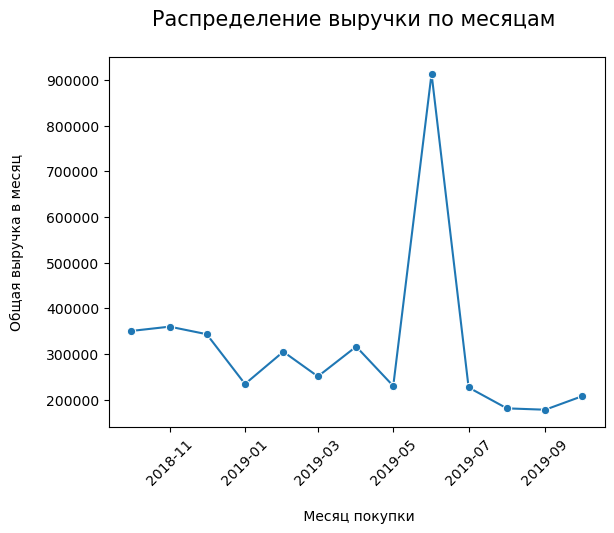

In [55]:
sns.lineplot(data=grouped_by_month, x="month", y="total_price", marker='o')
plt.xticks(rotation=45)
plt.title('Распределение выручки по месяцам \n', fontsize=15)
plt.ylabel('Общая выручка в месяц\n')
plt.xlabel('\n Месяц покупки')
plt.show();

В целом выручка распределяется равномерно, если не считать внезапный и при этом очень высокий рост выручки в июне. 
По данным описательной статистики есть выбросы и это, похоже, они: слишком высокий пик на фоне всего остального. Дальше мы этот вопрос обязательно исследуем.

### Ассортимент товаров

Посмотрим на распределение количества уникальных товаров в каждой товарной категории в наших транзакциях.

In [56]:
df_product_cat = (df.groupby('product_category')['product'].agg('nunique')
 .reset_index()
 .rename(columns={'index':'product_category', 'product': 'number_of_unique_goods'})
 .sort_values(by='number_of_unique_goods', ascending=False)                 
                 )
df_product_cat['precentage'] = (df_product_cat['number_of_unique_goods']/df['product'].nunique())*100
df_product_cat.style.format({'precentage': '{:.0f}'}).background_gradient(cmap='Blues', axis=0)

,product_category,number_of_unique_goods,precentage
7,plants_seeds,966,41
2,cleaning_washing,372,16
5,kitchen,324,14
3,home_decor,177,8
9,storage,149,6
0,bags_carts,108,5
1,bathroom_wc,102,4
8,renovation,72,3
4,home_linen,61,3
6,no_category,2,0


In [57]:
df['product'].nunique()

2333

<a name='stage_4'></a>
# Шаг 4. Создание сводной таблицы с профилями покупателей
[Назад к оглавлению](#contents)

## Добавление числовых показателей и даты последнего заказа

Сделаем группировку по покупателям и их заказам и выведем общую сумму для каждого заказа. Нам она понадобится, чтобы вычислить средний чек для каждого покупателя. Мы не можем сразу по каждому order_id вычислять средний чек, потому что у нас может быть несколько строк с одним айди, если в заказе несколько разных позиций.

In [58]:
groupped_by_orders = df.groupby(['customer_id','order_id']).agg({'total_price': 'sum', 'quantity': 'sum'}).reset_index()
groupped_by_orders.head()

,customer_id,order_id,total_price,quantity
0,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,555.0,4
1,001cee7f-0b29-4716-b202-0042213ab038,70290,442.0,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,72965,914.0,2
3,002d4d3a-4a59-406b-86ec-c3314357e498,69990,1649.0,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,72796,2324.0,2


На основе этой промежуточной сводной таблицы вычислим средний чек заказов и среднее количество товаров в чеке покупателя. 

In [59]:
average_order_price = (groupped_by_orders.
      groupby('customer_id')
      .agg({'total_price': 'mean', 'quantity': 'mean'})
      .rename(columns={'total_price':'average_order_price', 'quantity': 'average_order_size'})
      .reset_index())
average_order_price.head()

,customer_id,average_order_price,average_order_size
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0,4.0
1,001cee7f-0b29-4716-b202-0042213ab038,442.0,1.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.0,2.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.0,1.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.0,2.0


Создадим сводную таблицу по каждому покупателю.

In [60]:
profiles = (df
            .sort_values(by=['customer_id', 'month'])
            .groupby(['customer_id'])
            .agg(
                {
                    'month': 'last',
                    'total_price': 'sum',
                    'order_id': 'nunique',
                    'quantity': 'sum',
    
                }
            )
            .rename(columns={'month': 'last_order','total_price': 'total_order_price', 'order_id':'number_of_orders', 'quantity': 'total_of_goods'})
            .reset_index()
           )

In [61]:
pd.set_option('display.float_format', '{:.2f}'.format)
profiles.head(100)

,customer_id,last_order,total_order_price,number_of_orders,total_of_goods
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-01,555.00,1,4
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-01,442.00,1,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-01,914.00,1,2
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-01,1649.00,1,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-01,2324.00,1,2
...,...,...,...,...,...
95,09a5e5d4-be3f-4c62-a2c6-8bb3f2c39df5,2019-02-01,2099.00,1,1
96,09b6f1be-abbf-42b2-bfe0-d71233b3e1e2,2018-12-01,464.00,1,1
97,09bcc3d0-8134-4f00-8ea5-b74b55d766ad,2019-06-01,5549.00,1,1
98,09fd0763-f767-4572-b986-3ac312ddfd17,2019-07-01,1349.00,1,1


Добавляем в профиль средний чек.

Объединяем профили с average_order_price.

In [62]:
profiles = profiles.merge(average_order_price, how='left')

Смотрим на наш профиль потребления.

In [63]:
profiles.head()

,customer_id,last_order,total_order_price,number_of_orders,total_of_goods,average_order_price,average_order_size
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-01,555.00,1,4,555.00,4.00
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-01,442.00,1,1,442.00,1.00
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-01,914.00,1,2,914.00,2.00
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-01,1649.00,1,1,1649.00,1.00
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-01,2324.00,1,2,2324.00,2.00


Проверим на каком-нибудь покупателе, что у нас получилось. Покупатель с айди 0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e совершил 3 заказа.

In [64]:
check = df.query('customer_id=="0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e"')
display(check)
print("Дата последнего заказа:", check['date'].max())
print("Общая сумма всех заказов:", check['total_price'].sum())
print("Количество совершенных заказов:", check['order_id'].nunique())
print("Общее количество заказанных товаров:", check['quantity'].sum())
print("Средний чек по всем заказам:", check['total_price'].sum()/3)
print("Среднее количество товаров в заказе:", check['quantity'].sum()/3)

,date,customer_id,order_id,product,quantity,price,month,total_price,product_lemmas,product_category
6145,2019-08-21 00:05:00,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,14920,Пеларгония зональная диам. 12 см сиреневый пол...,1,188.00,2019-08-01,188.00,пеларгония зональный диам сиреневый полумахровый,plants_seeds
6146,2019-08-21 00:05:00,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,14920,Пеларгония розебудная Mary укорененный черенок,1,135.00,2019-08-01,135.00,пеларгония розебудный укоренить черенок,plants_seeds
6147,2019-08-21 00:05:00,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,14920,Пеларгония розебудная Prins Nikolai укорененны...,2,135.00,2019-08-01,270.00,пеларгония розебудный укоренить черенок,plants_seeds
6148,2019-08-21 00:05:00,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,14920,Пеларгония тюльпановидная EMMA,1,135.00,2019-08-01,135.00,пеларгония тюльпановидный,plants_seeds
6200,2019-08-27 00:05:00,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,14926,"Флокс метельчатый сорт Чурленис, диаметр горшк...",1,135.00,2019-08-01,135.00,флокс метельчатый сорт чурленис диаметр горшок,plants_seeds
6199,2019-08-27 00:05:00,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,14926,"Флокс метельчатый сорт ПОЛИНА, диаметр горшка ...",1,135.00,2019-08-01,135.00,флокс метельчатый сорт полина диаметр горшок,plants_seeds
6196,2019-08-27 00:05:00,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,14926,Пеларгония тюльпановидная EMMA,1,135.00,2019-08-01,135.00,пеларгония тюльпановидный,plants_seeds
6197,2019-08-27 00:05:00,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,14926,"Флокс метельчатый сорт Мари, диаметр горшка 10см.",1,135.00,2019-08-01,135.00,флокс метельчатый сорт марь диаметр горшок,plants_seeds
6198,2019-08-27 00:05:00,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,14926,Флокс метельчатый сорт Морской петух Новый сор...,1,135.00,2019-08-01,135.00,флокс метельчатый сорт морской петух новый сор...,plants_seeds
6542,2019-10-08 01:03:00,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,14940,Пеларгония розебудная Mary укорененный черенок,1,135.00,2019-10-01,135.00,пеларгония розебудный укоренить черенок,plants_seeds


Дата последнего заказа: 2019-10-08 01:03:00
Общая сумма всех заказов: 1538.0
Количество совершенных заказов: 3
Общее количество заказанных товаров: 11
Средний чек по всем заказам: 512.6666666666666
Среднее количество товаров в заказе: 3.6666666666666665


In [65]:
profiles.query('customer_id=="0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e"')

,customer_id,last_order,total_order_price,number_of_orders,total_of_goods,average_order_price,average_order_size
127,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,2019-10-01,1538.00,3,11,512.67,3.67


Все сходится. 

## Добавление количества заказов в каждой категорий для каждого покупателя

Нам интересно посмотреть для каждого покупателя, товары из каких категорий он заказывает чаще всего. 

In [66]:
# Сначала сгруппируем по заказам и покупателям
group_orders = (df.groupby(['customer_id', 'order_id'])
                .agg({'product_category': 'value_counts'})
                .rename(columns={'product_category':'number_of_categories_in_order'})
                .reset_index())

# Теперь на основе этой группировки создадим сводную табличку, 
#где на каждого покупателя по каждой категории будет указано кол-во заказов
custom_order_cat = (group_orders.pivot_table(index=['customer_id'], 
                                             columns='product_category', 
                                             values='order_id', aggfunc='count')
                    .reset_index()
                    .fillna(0))
custom_order_cat.columns.name = None
custom_order_cat

,customer_id,bags_carts,bathroom_wc,cleaning_washing,home_decor,home_linen,kitchen,no_category,plants_seeds,renovation,storage
0,000d6849-084e-4d9f-ac03-37174eaf60c4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,001cee7f-0b29-4716-b202-0042213ab038,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,00299f34-5385-4d13-9aea-c80b81658e1b,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,002d4d3a-4a59-406b-86ec-c3314357e498,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,003bbd39-0000-41ff-b7f9-2ddaec152037,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
2392,ff601403-b094-4b86-9ac6-264d725b9277,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2393,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2394,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2395,ffb80538-3fda-4351-8ea9-9d2bec58bb07,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


Изменим тип данных у числовых признаков - пусть будет целочисленное int8.

In [67]:
for column_name in custom_order_cat.describe().columns:
    custom_order_cat = custom_order_cat.astype({column_name: 'int8'})

Возьмем покупателя с большим количеством заказов в разных категориях.

In [68]:
profiles.query('number_of_orders == 4')

,customer_id,last_order,total_order_price,number_of_orders,total_of_goods,average_order_price,average_order_size
685,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,2019-04-01,41900.00,4,85,10475.00,21.25
1779,bea7a833-2074-42db-bc49-4457abd3c930,2019-06-01,4409.00,4,30,1102.25,7.50
2097,e0535076-6270-4df2-8621-cb06264a94fa,2019-05-01,636.00,4,4,159.00,1.00


In [69]:
custom_order_cat.query('customer_id=="498f12a4-6a62-4725-8516-cf5dc9ab8a3a"')

,customer_id,bags_carts,bathroom_wc,cleaning_washing,home_decor,home_linen,kitchen,no_category,plants_seeds,renovation,storage
685,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,0,0,1,0,2,1,0,0,0,0


In [70]:
df.query('customer_id=="498f12a4-6a62-4725-8516-cf5dc9ab8a3a"')

,date,customer_id,order_id,product,quantity,price,month,total_price,product_lemmas,product_category
2970,2019-04-19 01:08:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71205,Наматрацник Natures Бархатный бамбук ББ-Н-1-2 ...,12,1183.00,2019-04-01,14196.00,наматрацник бархатный бамбук односпальный хлоп...,home_linen
2969,2019-04-19 01:08:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71204,Салфетка Protec Textil Polyline 30х43 см Амети...,60,191.00,2019-04-01,11460.00,салфетка аметист белый,kitchen
2972,2019-04-19 01:09:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71207,"Таз пластмассовый строительный круглый 40 л, 1...",3,188.00,2019-04-01,564.00,таз пластмассовый строительный круглый,cleaning_washing
2971,2019-04-19 01:09:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,Одеяло Wellness T142 белое темостеганое 140х20...,10,1568.00,2019-04-01,15680.00,одеяло белый темостёганый чехол полиэстер,home_linen


Все сходится. Мы провели верные расчеты. 

Добавим эту таблицу с фичами в нашу общую таблицу с профилем потребления.

Объединяем профили с custom_order_cat.

In [71]:
profiles = profiles.merge(custom_order_cat, how='left')

In [72]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2397 entries, 0 to 2396
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          2397 non-null   object        
 1   last_order           2397 non-null   datetime64[ns]
 2   total_order_price    2397 non-null   float64       
 3   number_of_orders     2397 non-null   int64         
 4   total_of_goods       2397 non-null   int64         
 5   average_order_price  2397 non-null   float64       
 6   average_order_size   2397 non-null   float64       
 7   bags_carts           2397 non-null   int8          
 8   bathroom_wc          2397 non-null   int8          
 9   cleaning_washing     2397 non-null   int8          
 10  home_decor           2397 non-null   int8          
 11  home_linen           2397 non-null   int8          
 12  kitchen              2397 non-null   int8          
 13  no_category          2397 non-nul

Итак, в нашем профиле `2 397 покупателей`, как и было изначально в отфильтрованных данных.

Сохраним на всякий случай себе датасет с профилем покупателей

In [73]:
df.to_csv('profiles.csv',index=False) 

Исследуем наших покупателей.

In [74]:
df = pd.read_csv('profiles.csv')
df.head()

,date,customer_id,order_id,product,quantity,price,month,total_price,product_lemmas,product_category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00,2018-10-01,142.00,комнатный растение горшок алый вера,plants_seeds
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.00,2018-10-01,194.00,комнатный растение горшок кофе арабика,plants_seeds
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00,2018-10-01,112.00,радермахер,plants_seeds
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00,2018-10-01,179.00,хризолидокарпус лутесценс,plants_seeds
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00,2018-10-01,112.00,циперус зумул,plants_seeds


<a name='stage_5'></a>
# Шаг 5. Исследование профиля потребления
[Назад к оглавлению](#contents)

## Дата последнего заказа

Изучим месяц, в который произошел последний заказ.

In [75]:
profiles['last_order'].value_counts()

2019-02-01    236
2019-04-01    227
2018-12-01    224
2019-03-01    223
2019-07-01    182
2018-11-01    176
2018-10-01    174
2019-10-01    169
2019-09-01    169
2019-08-01    163
2019-05-01    159
2019-06-01    148
2019-01-01    147
Name: last_order, dtype: int64

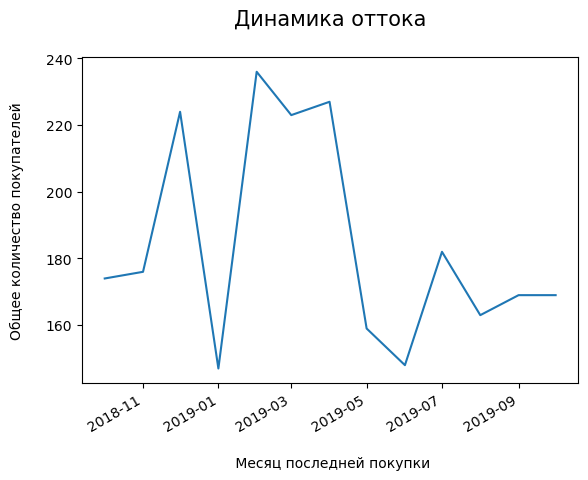

In [76]:
profiles['last_order'].value_counts().plot();
plt.title('Динамика оттока\n', fontsize=15)
plt.xlabel('\n Месяц последней покупки')
plt.ylabel('Общее количество покупателей\n')
plt.show()

In [77]:
("Процент клиентов, которые перестали заказывать после октября и ноября 2018: {:.1%}"
.format((len(profiles[profiles['last_order']=='2018-10-01']) 
         + len(profiles[profiles['last_order']=='2018-11-01']))/uniq_clients)
)

'Процент клиентов, которые перестали заказывать после октября и ноября 2018: 14.6%'

Больше всего покупателей последний раз совершили покупку в феврале 2019 года. 

Создадим функцию для исследования нашего профиля потребителей: посмотрим на описательную статистику числовых признаков, построим диаграмму рассеивания.

In [78]:
"""
Функция принимает имя датафрейма и имя столбца датафрейма и 
выводит на экран описательную статистику с помощью функции describe(),
а также рисует точечную диаграмму по признаку-имени столбца.

Аргументы функции:

dataframe - строка (имя датафрейма)
column_name - строка (имя столбца)


Для имени столбца используется словарь вида: ключ словаря - имя столбца, значение - строка-значение признака.

"""
dic_features = {
'total_order_price': '"Общая стоимость всех заказов"',
'number_of_orders': '"Общее количество совершенных заказов"',
'total_of_goods': '"Общее количество купленных товаров"',
'average_order_price': '"Средний чек"',
'average_order_size': '"Среднее количество позиций в заказе"',
'bags_carts': '"Количество заказов в категории "Тележки-сумки""',
'bathroom_wc': '"Количество заказов в категории "Ванная и туалет""',
'cleaning_washing':'"Количество заказов в категории "Уборка""',      
'home_decor':'"Количество заказов в категории "Декор и уют""',         
'home_linen':'"Количество заказов в категории "Домашний текстиль""',           
'kitchen':'"Количество заказов в категории "Кухня""',         
'plants_seeds':'"Количество заказов в категории "Растения и семена""', 
'no_category':'"Количество заказов в категории "Остальное""', 
'renovation':'"Количество заказов в категории "Ремонт""',        
'storage':'"Количество заказов в категории "Хранение""'
 }

def get_analysis(dataframe, column_name):
    print('Описательная статистика для признака {} \n'.format(dic_features[column_name]))
    display(dataframe[column_name].describe())
    x_values = pd.Series(range(0,len(dataframe[column_name])))
    plt.scatter(x_values, dataframe[column_name])
    plt.title('\n Диаграмма рассеивания признака {} \n'.format(dic_features[column_name]), fontsize=15)
    plt.show();
    print('95 и 99-й персентили признака: {}'.format(dic_features[column_name]))
    print(np.percentile(dataframe[column_name], [95, 99]))

## Общая стоимость всех заказов

Описательная статистика для признака "Общая стоимость всех заказов" 



count     2397.00
mean      1708.78
std      14414.46
min         14.00
25%        299.00
50%        712.00
75%       1574.00
max     675000.00
Name: total_order_price, dtype: float64

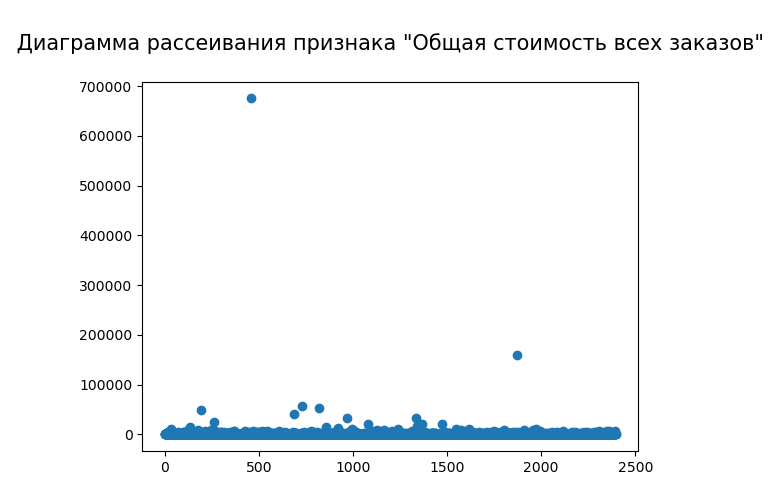

95 и 99-й персентили признака: "Общая стоимость всех заказов"
[4272.4  8823.52]


In [79]:
get_analysis(profiles, 'total_order_price')

Интересно, кто  купил на почти 700 000 рублей. 

In [80]:
profiles.query('total_order_price > 100000')

,customer_id,last_order,total_order_price,number_of_orders,total_of_goods,average_order_price,average_order_size,bags_carts,bathroom_wc,cleaning_washing,home_decor,home_linen,kitchen,no_category,plants_seeds,renovation,storage
457,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,2019-06-01,675000.00,1,1000,675000.00,1000.00,0,1,0,0,0,0,0,0,0,0
1873,c971fb21-d54c-4134-938f-16b62ee86d3b,2019-03-01,159508.00,126,334,1265.94,2.65,21,8,46,9,2,10,0,24,5,4


In [81]:
df[df['customer_id'] == '312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6']

,date,customer_id,order_id,product,quantity,price,month,total_price,product_lemmas,product_category
3784,2019-06-18 01:05:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.00,2019-06-01,675000.00,вантуз деревянный ручка красный,bathroom_wc


Один покупатель купил 1000 вантузов в июне:) - чистый туалет обеспечен и вот отгадка на вопрос, почему в июне так резко подскочила выручка! А другой клиент просто совершил много заказов - суммарно 126.

**Вывод**

* У общей стоимости всех заказов большой размах значений, поскольку в данных присутствуют выбросы: 
клиент c id 312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6 купил 1000 вантузов, а клиент с id c971fb21-d54c-4134-938f-16b62ee86d3b совершил 126 заказов.

* В целом лишь 5 % наших покупателей заказали на сумму больше 4 272 рублей. 

* 1% клиентов - на сумму больше 8 823 рублей. Это можно считать выбросом в наших данных.

* Половина наших покупателей совершает в общей сумме заказов не больше чем на 712 рублей, а 75% - не больше, чем на 1574 рублей. 

## Количество заказов

Описательная статистика для признака "Общее количество совершенных заказов" 



count   2397.00
mean       1.15
std        2.68
min        1.00
25%        1.00
50%        1.00
75%        1.00
max      126.00
Name: number_of_orders, dtype: float64

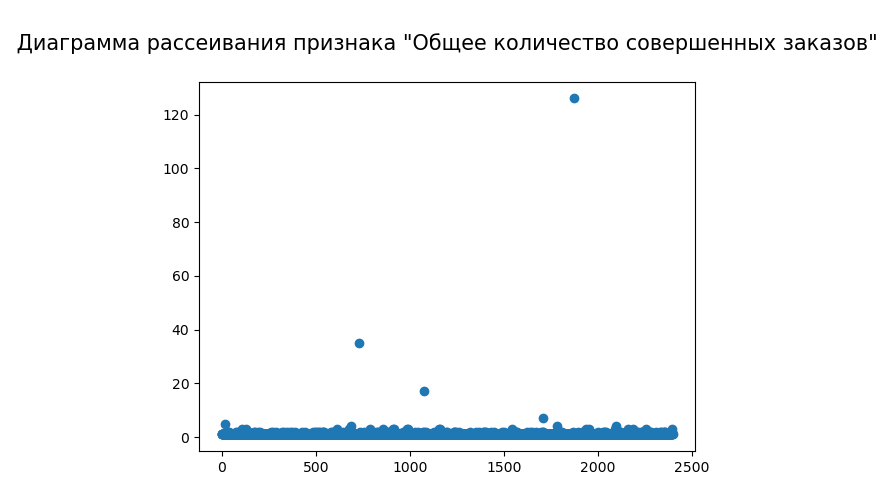

95 и 99-й персентили признака: "Общее количество совершенных заказов"
[2. 3.]


In [82]:
get_analysis(profiles, 'number_of_orders')

На графике хорошо виден тот самый покупатель с 126 заказами (аномальное число заказов для этих данных), у которого общая сумма всех заказов равна 159 508 рублей. 

Посмотрим на клиентов, совершивших два и более заказов, посчитаем более точно, какой процент от общего числа клиентов составляют такие покупатели.

In [83]:
profiles.query('number_of_orders >= 2')

,customer_id,last_order,total_order_price,number_of_orders,total_of_goods,average_order_price,average_order_size,bags_carts,bathroom_wc,cleaning_washing,home_decor,home_linen,kitchen,no_category,plants_seeds,renovation,storage
16,0184f535-b60a-4914-a982-231e3f615206,2019-05-01,5891.00,5,58,1178.20,11.60,0,0,0,0,0,0,0,5,0,0
31,02adb72a-3067-45e9-a3b5-f93d79d7496a,2019-04-01,10723.00,2,2,5361.50,1.00,2,0,0,0,0,0,0,0,0,0
37,036118cf-c198-48fa-ba15-6d841482a56d,2018-12-01,1926.00,2,18,963.00,9.00,0,0,0,0,0,2,0,0,0,0
76,07abcccf-1887-4b4e-b6bf-8054759bc419,2019-06-01,1316.00,2,4,658.00,2.00,0,2,0,0,0,0,0,0,0,0
82,08199320-6a87-4a2c-8565-dfc0c8484184,2019-02-01,134.00,2,2,67.00,1.00,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,facadcf2-2c13-4d8f-baa3-567821546534,2019-07-01,7049.00,2,2,3524.50,1.00,0,2,0,0,0,0,0,0,0,0
2353,fb2f95f0-1f30-4e6a-a75c-92d1e2d341e3,2019-01-01,268.00,2,2,134.00,1.00,0,0,2,0,0,0,0,0,0,0
2354,fb7421fb-53d1-46d8-bfaa-7f3f7c51e276,2019-03-01,2112.00,2,24,1056.00,12.00,0,0,0,0,0,2,0,0,0,0
2390,ff31d802-dae6-484d-a3dc-c9723f1cb538,2019-05-01,5998.00,2,2,2999.00,1.00,0,0,0,0,0,0,0,0,2,0


In [84]:
("Процент клиентов, совершивших два и более заказов: {:.1%}"
 .format(profiles.query('number_of_orders >= 2').shape[0]/profiles.shape[0]))


'Процент клиентов, совершивших два и более заказов: 6.5%'

**Вывод**  
    
* 93.5% наших клиентов совершают только 1 заказ.
    
* Лишь 6.5% процентов клиентов оформляли  два и более заказов. При этом среди этих клиентов есть выбросы, хотя доля их мала (1%).  
    
* Лишь 1% клиентов оформляли больше 3 заказов. Это можно считать выбросом в этих данных.    

## Среднее количество позиций в заказе

Описательная статистика для признака "Среднее количество позиций в заказе" 



count   2397.00
mean       5.01
std       25.47
min        1.00
25%        1.00
50%        1.00
75%        3.00
max     1000.00
Name: average_order_size, dtype: float64

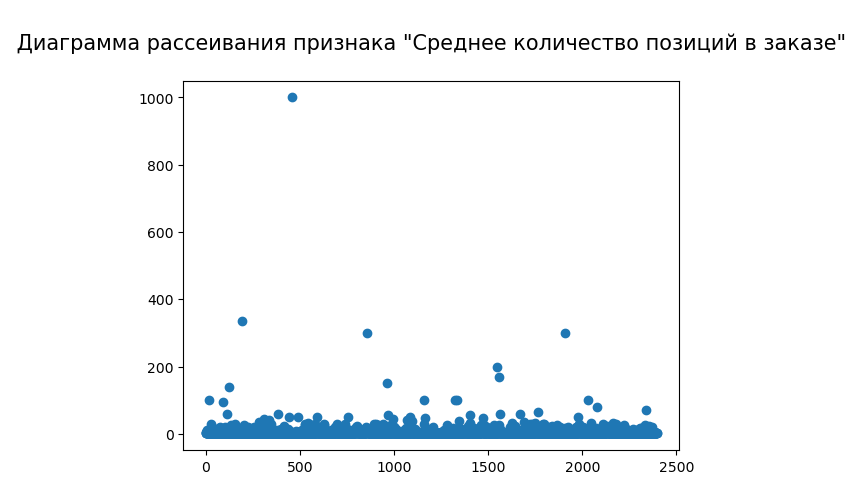

95 и 99-й персентили признака: "Среднее количество позиций в заказе"
[18.   50.04]


In [85]:
get_analysis(profiles, 'average_order_size')

In [86]:
len(profiles.query('average_order_size > 50'))

24

**Вывод**
    
* Половина наших покупателей заказывает в среднем не больше 1 позиции в заказе.

* 75 % наших покупателей заказывают в среднем не более 3 позиций в заказе.
    
* Лишь 5 процентов покупателей заказывают больше 18 позиций.     
    
* Лишь 1 процент покупателей заказывал в среднем больше 50 позиций. Это можно считать выбросом в этих данных.
    

## Средний чек

Описательная статистика для признака "Средний чек" 



count     2397.00
mean      1515.43
std      13930.92
min         14.00
25%        296.00
50%        675.00
75%       1471.00
max     675000.00
Name: average_order_price, dtype: float64

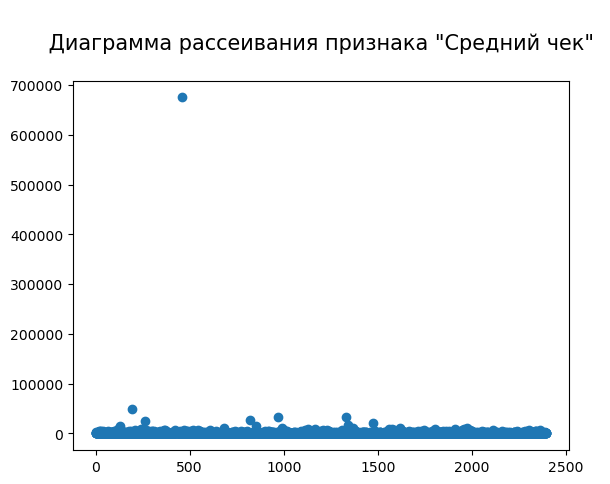

95 и 99-й персентили признака: "Средний чек"
[3970.8  7878.28]


In [87]:
get_analysis(profiles, 'average_order_price')

**Вывод**
    
* У половины наших клиентов средний чек не выше 675 рублей.
    
* У 75% - не выше 1 471 рублей.

* Лишь 5 процентов покупателей имеют средний чек выше 3 970 рублей.  

* Не более 1 процента имеют средний чек выше 7 787 рублей. Это можно считать выбросом в этих данных.

## Фильтрация выбросов в данных

Сделаем срез аномальных пользователей с помощью 99-го персентиля. 

Возьмем 99-й персентиль как границу по выбросам.

In [88]:
total_order_price_lim = np.percentile(profiles['total_order_price'], 99)
number_of_orders_lim = np.percentile(profiles['number_of_orders'], 99)
average_order_size_lim = np.percentile(profiles['average_order_size'], 99)
average_order_price_lim = np.percentile(profiles['average_order_price'], 99)
print('Аномальная общая стоимость заказа:', total_order_price_lim)
print('Аномальное число совершенных заказов:', number_of_orders_lim)
print('Аномальное среднее количество позиций в заказе:', average_order_size_lim)
print('Аномальный средний чек', average_order_price_lim)

Аномальная общая стоимость заказа: 8823.519999999988
Аномальное число совершенных заказов: 3.0
Аномальное среднее количество позиций в заказе: 50.039999999999964
Аномальный средний чек 7878.2799999999925


Запишем в отдельные переменные наши срезы по клиентам с аномальными значениями признаков.

In [89]:
ab_total_price = profiles.query("total_order_price > @total_order_price_lim")
ab_number_of_orders = profiles.query("number_of_orders > @number_of_orders_lim")
ab_average_order_size = profiles.query("average_order_size > @average_order_size_lim")
ab_average_order_price = profiles.query("average_order_price > @average_order_price_lim")
ab_product_cat = profiles.query("no_category!=0")

Объединим всех наших аномальных клиентов в один фрейм и удалим дубликаты.

In [90]:
abnormal_clients = (
    pd.concat([ab_total_price, ab_number_of_orders,ab_average_order_size, ab_average_order_price,ab_product_cat], axis=0)
    .drop_duplicates()
)
print('\nКоличество аномальных клиентов:', abnormal_clients.shape[0])


Количество аномальных клиентов: 54


Проверим, что получилось:

In [91]:
abnormal_clients.head()

,customer_id,last_order,total_order_price,number_of_orders,total_of_goods,average_order_price,average_order_size,bags_carts,bathroom_wc,cleaning_washing,home_decor,home_linen,kitchen,no_category,plants_seeds,renovation,storage
31,02adb72a-3067-45e9-a3b5-f93d79d7496a,2019-04-01,10723.00,2,2,5361.50,1.00,2,0,0,0,0,0,0,0,0,0
131,0d87f4ae-465a-4fac-81e6-5d629761783e,2019-07-01,14917.00,1,1,14917.00,1.00,0,0,1,0,0,0,0,0,0,0
176,126dac4d-6486-49ed-a1be-9fd55a38a9de,2019-08-01,9148.00,2,2,4574.00,1.00,2,0,0,0,0,0,0,0,0,0
194,146cd9bf-a95c-4afb-915b-5f6684b17444,2019-06-01,49432.00,1,334,49432.00,334.00,0,0,0,0,0,0,0,0,0,1
262,1b2764ad-9151-4051-a46a-9b01b62e6335,2018-11-01,24370.00,1,5,24370.00,5.00,0,0,0,0,0,0,0,0,0,1


Создадим профили наших клиентов без выбросов.

In [92]:
profiles_without_abnormals = profiles[~profiles.index.isin(abnormal_clients.index)]
#Удалим столбец no_category
profiles_without_abnormals = profiles_without_abnormals.drop(['no_category'], axis=1)
print("Размер исходного профиля потребителей:", profiles.shape[0])
print("Размер профиля потребителей без выбросов: ",profiles_without_abnormals.shape[0])

Размер исходного профиля потребителей: 2397
Размер профиля потребителей без выбросов:  2343


Все сходится: 54 клиентов с аномальными значениями удалены из профиля без аномалий.

Посчитаем процент выбросов.

In [93]:
("Процент аномальных клиентов: {:.1%}"
 .format(1 - profiles_without_abnormals.shape[0] / profiles.shape[0]))

'Процент аномальных клиентов: 2.3%'

Теперь мы можем легко анализировать очищенные данные, используя этот датафрейм.   

In [94]:
profiles_without_abnormals.describe()

,total_order_price,number_of_orders,total_of_goods,average_order_price,average_order_size,bags_carts,bathroom_wc,cleaning_washing,home_decor,home_linen,kitchen,plants_seeds,renovation,storage
count,2343.00,2343.00,2343.00,2343.00,2343.00,2343.00,2343.00,2343.00,2343.00,2343.00,2343.00,2343.00,2343.00,2343.00
mean,1119.29,1.07,3.64,1068.87,3.37,0.13,0.06,0.24,0.10,0.02,0.13,0.32,0.03,0.07
std,1258.95,0.28,6.46,1213.86,5.82,0.34,0.25,0.45,0.32,0.15,0.35,0.53,0.18,0.26
min,14.00,1.00,1.00,14.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,299.00,1.00,1.00,284.50,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,688.00,1.00,1.00,658.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1497.00,1.00,3.00,1368.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,7950.00,3.00,64.00,7870.00,50.00,3.00,3.00,2.00,3.00,1.00,3.00,3.00,2.00,2.00


## Распределение покупателей по количеству совершенных заказов в каждой товарной категории.

Построим столбчатые диаграммы по каждой товарной категории (кроме no_category), чтобы увидеть самые популярные и наименее востребованные категории.

Мы будем смотреть на распределение на очищенных от выбросов данных.

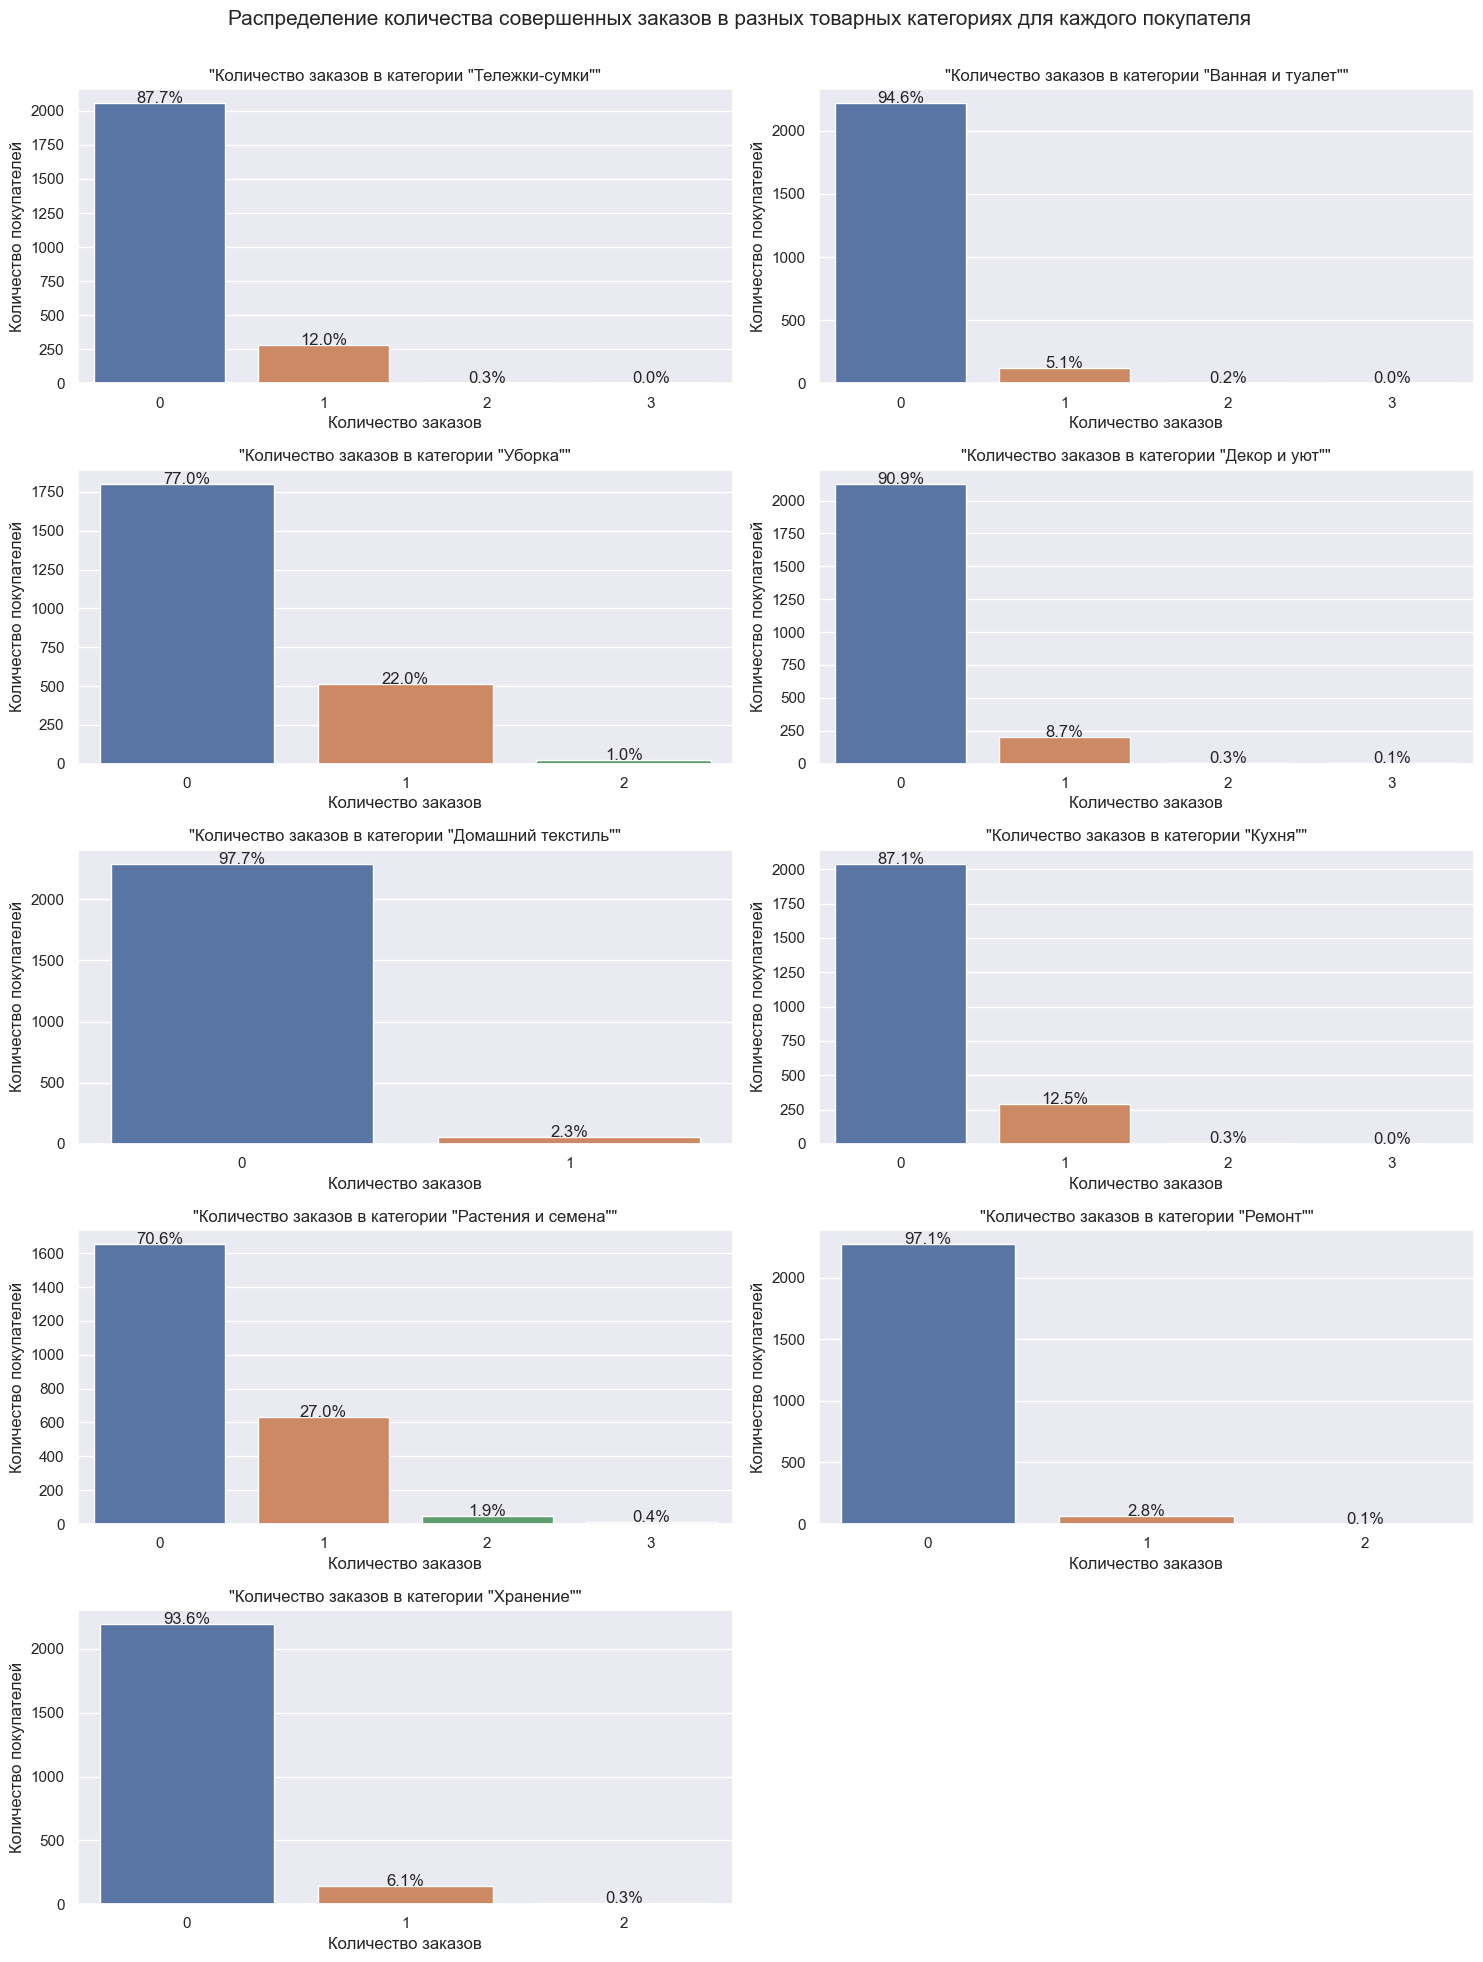

In [95]:
plt.figure(figsize=(15, 20))
sns.set_palette('muted')
sns.set_theme(style="darkgrid")
total = profiles_without_abnormals.shape[0]

for i, col in enumerate((profiles_without_abnormals.drop(['customer_id', 'last_order', 'total_order_price', 
                                       'number_of_orders', 'total_of_goods', 
                                        'average_order_price', 'average_order_size'], axis=1).columns)):
 
    plt.subplot(5, 2,i+1)
    ax = sns.countplot(data=profiles_without_abnormals, x=profiles_without_abnormals[col], order=profiles_without_abnormals[col].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
    plt.title(dic_features[col])
    plt.xlabel('Количество заказов')
    plt.ylabel('Количество покупателей')

plt.suptitle('Распределение количества совершенных заказов в разных товарных категориях для каждого покупателя \n\n', fontsize=15)
plt.tight_layout()
plt.show();





**Вывод** 

* Большая часть наших клиентов приходит за товарами из категории "Растения и семена": 27.0% совершают по 1 заказу, 1.9% делают 2 заказа. 

* 22.0 % клиентов сделали по 1 заказу из категории "Уборка", 1% клиентов совершили в этой категории 2 заказа. 

* 12.5% клиентов совершили по 1 заказу в категории "Кухня" и 0.3% клиентов сделали в этой категории 2 заказа. 

* На третьем месте по популярность среди наших клиентов  - категория "Сумки-тележки": 12.0% клиентов совершили 1 заказ, 0.3% сделали 2 заказа. 

* Меньше всего наших клиентов интересуют категории "Домашний текстиль" и "Ремонт":  только 2.3% и 2.8% клиентов совершили 1 заказ соответственно. 
    

<a name='stage_6'></a>
# Шаг 6. Кластеризация клиентов с помощью машинного обучения
[Назад к оглавлению](#contents)

## Матрица корреляций признаков

Сначала изучим, есть ли коррелирующие признаки. Для этого построим матрицу корреляций.

In [96]:
cm = profiles_without_abnormals.corr() # вычисляем матрицу корреляций

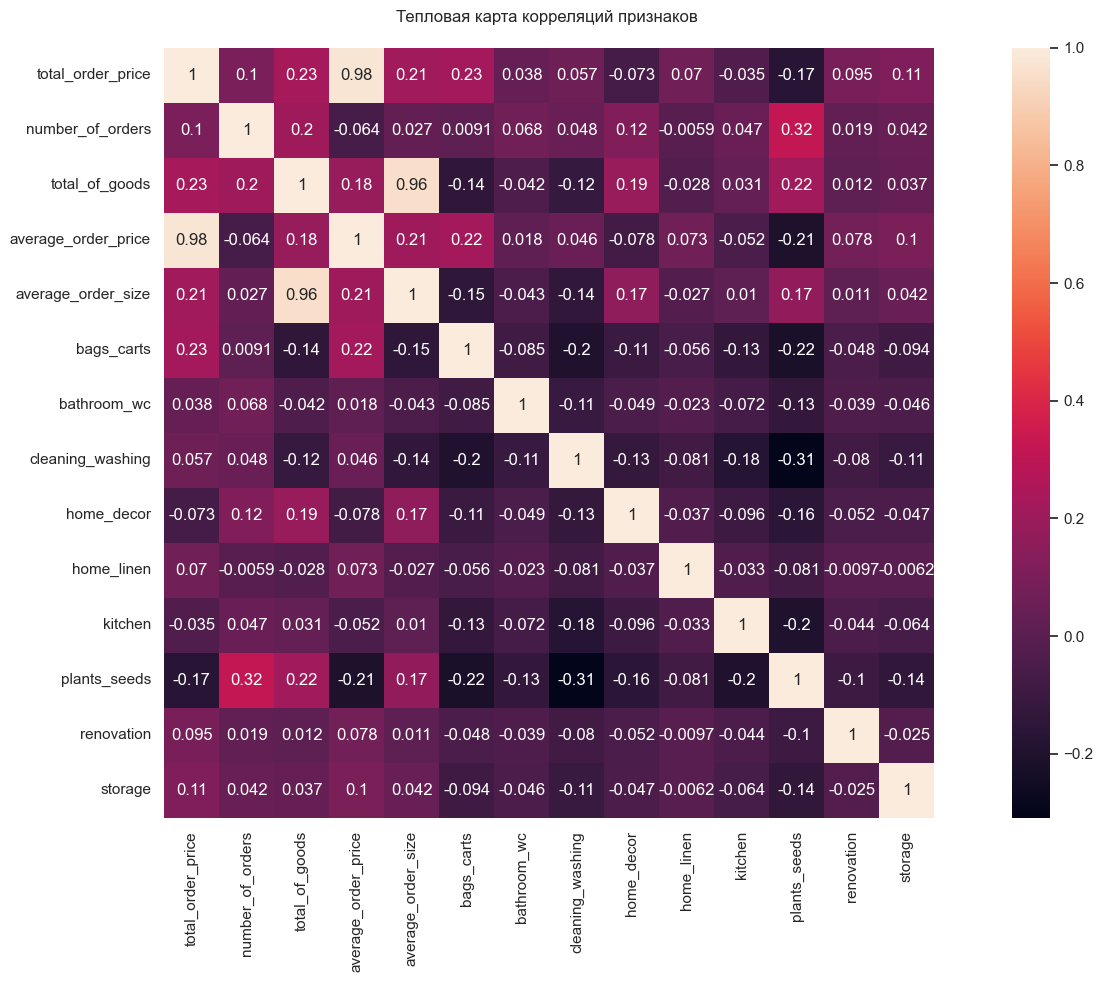

In [97]:
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, square=True);
plt.title('Тепловая карта корреляций признаков \n')
plt.show();

Cильную корреляцию показали пары: 

* общая стоимость всех заказов (total_order_price) и средний чек (average_order_price),
* общее количество всех заказанных товаров (total_of_goods) и среднее количество позиций в заказе (average_order_size).


## Дендрограмма

Подготовим матрицу признаков, стандартизируем и нормализируем данные.

In [98]:
profiles_for_km = profiles_without_abnormals.drop(['customer_id','last_order'], axis = 1)

# стандартизируем данные
scaler = StandardScaler()
X_st = scaler.fit_transform(profiles_for_km) 

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.

В переменной linked сохраняем таблицу «связок» между объектами. Её можно визуализировать как дендрогра

In [99]:
linked = linkage(X_st, method = 'ward')

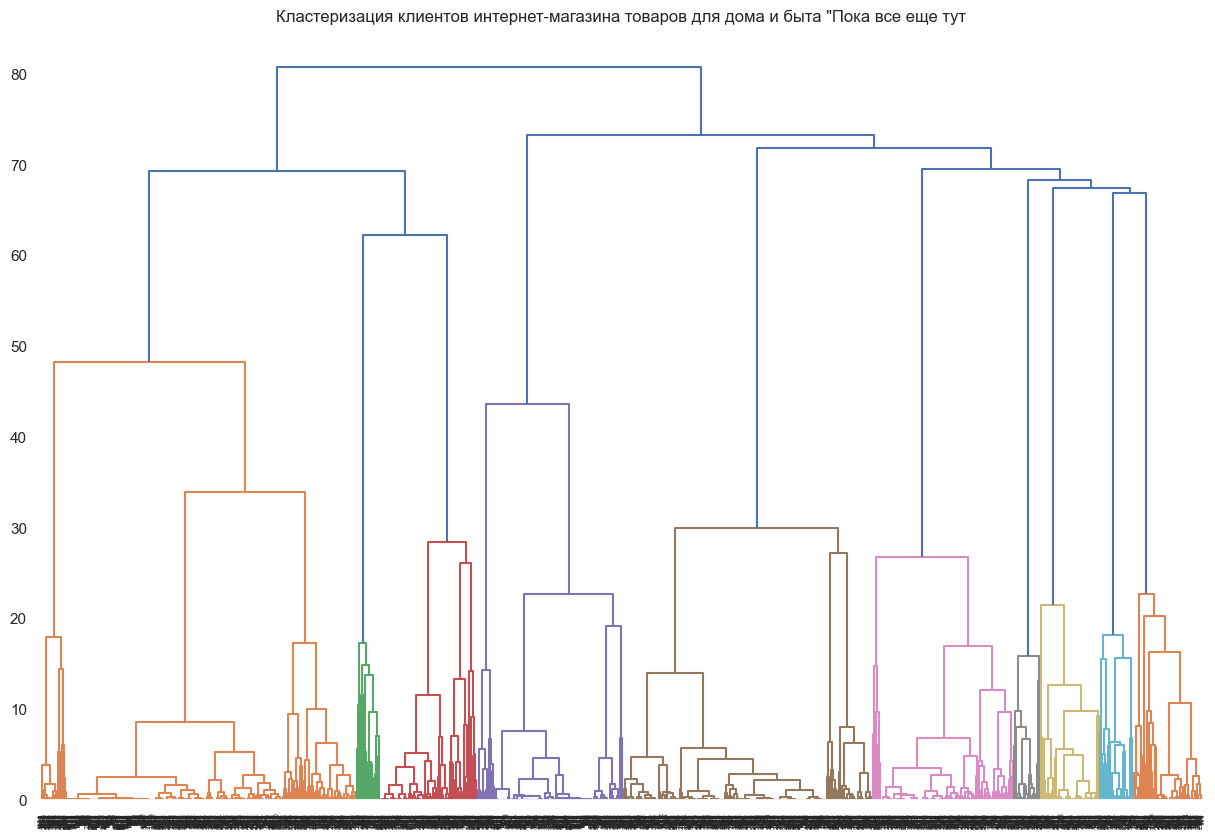

In [100]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов интернет-магазина товаров для дома и быта "Пока все еще тут')
plt.show()

Согласно данной дендрограмме можно предположить наличие 10 кластеров клиентов.

## Обучение модели K-Means

Чтобы избежать проблемы мультиколлинеарности, удалим из нашей выборки признаки total_order_price и total_of_goods (признаки из сильно коррелирующих пар). Кластеризацию мы будем проводить на данных без аномалий. А также уберем столбец no_category - он не репрезентативный.

Попробуем выделить 5 кластеров (у нас не так много клиентов и признаков).

In [101]:
#Удаляем столбцы 'total_order_price', 'total_of_goods', столбец с айди клиента 'customer_id',и с месяцем последней покупки
profiles_for_km = (profiles_without_abnormals
                   .drop(['total_order_price', 'total_of_goods', 'customer_id', 'last_order'], axis = 1)
                  )

# стандартизируем данные
scaler = StandardScaler()
X_st = scaler.fit_transform(profiles_for_km) 

# Задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)

# Применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(X_st)

# Сохраняем метки кластера в поле нашего датасета
profiles_without_abnormals['cluster_km'] = labels

Для удобства изменим названия кластеров.

In [102]:
profiles_without_abnormals.loc[profiles_without_abnormals['cluster_km']==0, 'cluster_km'] = 'cluster_1'
profiles_without_abnormals.loc[profiles_without_abnormals['cluster_km']==1, 'cluster_km'] = 'cluster_2'
profiles_without_abnormals.loc[profiles_without_abnormals['cluster_km']==2, 'cluster_km'] = 'cluster_3'
profiles_without_abnormals.loc[profiles_without_abnormals['cluster_km']==3, 'cluster_km'] = 'cluster_4'
profiles_without_abnormals.loc[profiles_without_abnormals['cluster_km']==4, 'cluster_km'] = 'cluster_5'

Посмотрим на распределение клиентов по кластерам в долях. 

In [103]:
(profiles_without_abnormals['cluster_km'].value_counts(normalize=True)
 .to_frame()
 .style.background_gradient(cmap='Blues', axis=None)
)

,cluster_km
cluster_1,0.502347
cluster_2,0.225352
cluster_4,0.127614
cluster_5,0.122066
cluster_3,0.022621


**Вывод**

Два самых крупных кластера - первый и второй: 50 % клиентов и 22 % клиентов соответственно.

Самый мелкий кластер - третий: всего 0.02% клиентов.

<a id='ml_clusters'></a> 
## Cредние значения признаков для каждого кластера клиентов

In [104]:
profiles_without_abnormals.groupby(['cluster_km']).mean().T

cluster_km,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
total_order_price,918.12,1211.43,1698.15,936.38,1861.07
number_of_orders,1.08,1.05,1.06,1.06,1.03
total_of_goods,5.14,1.83,2.43,3.59,1.10
average_order_price,863.27,1166.29,1653.91,883.22,1820.76
average_order_size,4.76,1.68,2.35,3.27,1.07
bags_carts,0.00,0.00,0.00,0.01,1.03
bathroom_wc,0.11,0.00,0.02,0.01,0.00
cleaning_washing,0.00,1.04,0.00,0.03,0.00
home_decor,0.18,0.02,0.02,0.01,0.00
home_linen,0.00,0.00,1.00,0.00,0.00


<a name="stage_7"></a>
# Шаг 7. Проверка статистических гипотез
[Назад к оглавлению](#contents)

Посмотрим на средние чеки в двух группах: у клиентов, которые перестали заказывать в октябре и ноябре 2018 года (год назад), и у остальных, которые покупали в течение года.

Сформулируем нулевую гипотезу:

𝐻0  - Средний чек у клиентов, переставших покупать год назад, и у тех, кто  покупал на протяжении года, равны.

Сформулируем альтерантивную гипотезу:

𝐻1  - Средний чек у клиентов, переставших покупать год назад, и у тех, кто  покупал на протяжении года, отличается.
    

In [105]:
year_ago_group = (profiles_without_abnormals
                  .query('last_order=="2018-10-01" or last_order=="2018-11-01"')
                 )
                  
("Размер выборки клиентов, которые перестали покупать год назад: {}"
 .format(len(year_ago_group))
)

'Размер выборки клиентов, которые перестали покупать год назад: 337'

In [106]:
other_clients = (profiles_without_abnormals[~profiles_without_abnormals
                            .index
                            .isin(profiles_without_abnormals
                                  .query('last_order=="2018-10-01" or last_order=="2018-11-01"')
                                  .index
                                 )]
                )
("Размер выборки клиентов, которые покупали на протяжении года: {}"
 .format(len(other_clients))
)

'Размер выборки клиентов, которые покупали на протяжении года: 2006'

Выборки получились неравномерные по количеству.

Чтобы оценить, какой статистический тест применить в данном случае, проверим, как распределены наши данные с помощью теста Шапиро-Уолка.
Ниже создадим функцию для проведения данного теста.

In [107]:
"""Функция для проведения теста Шапиро-Уилка
Критический уровень статистической значимости по умолчанию равен 0.05.
"""

def shapiro_test (sample, alpha = 0.05): 
    results = stats.shapiro(sample)
    p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value
    print('p-значение: ', p_value)
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

In [108]:
shapiro_test(year_ago_group['average_order_price'])

p-значение:  1.3587063562230028e-20
Отвергаем нулевую гипотезу: распределение не нормально


In [109]:
shapiro_test(other_clients['average_order_price'])

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Поскольку у нас данных мало и распределены они ненормально, применим тест Манна-Уитни. Ниже создадим функцию для проведения данного теста.

In [110]:
"""Функция для проведения теста Манна-Уитни
Критический уровень статистической значимости по умолчанию равен 0.05."""

def mannwhitneyu_test(sample1, sample2, alpha = 0.05):   
    results = stats.mannwhitneyu(sample1, sample2)
    print("P-value:{0:.3f}".format(results[1]))
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

In [111]:
mannwhitneyu_test(year_ago_group['average_order_price'], other_clients['average_order_price'])

P-value:0.000
Отвергаем нулевую гипотезу: разница статистически значима.


Проверим средние по нашим выборкам.

In [112]:
("Средний чек в группе клиентов в оттоке: {:.1f}"
 .format(year_ago_group['average_order_price'].mean())
)

'Средний чек в группе клиентов в оттоке: 1307.1'

In [113]:
("Средний чек в группе остальных клиентов: {:.1f}"
 .format(other_clients['average_order_price'].mean())
)

'Средний чек в группе остальных клиентов: 1028.8'

Да, действительно отличаются, причем у клиентов в оттоке средний чек выше.

<a name='stage_8'></a>
# Шаг 8. Общий вывод и рекомендации
[Назад к оглавлению](#contents)

Мы проанализировали данные о транзакциях интернет-магазина товаров для дома и быта "Пока все еще тут". 

В исходном датасете представлено 6737 строк (каждая строка - запись о заказе) и 6 столбцов-параметров заказа:
* date — дата заказа;
* customer_id — идентификатор покупателя;
* order_id — идентификатор заказа;
* product — наименование товара;
* quantity — количество товара в заказе;
* price — цена товара. 

В ходе исследования выяснилось, что в данных присутствуют задублированные заказы, когда один и тот же клиент под одним и тем же номером заказа покупает одно и то же по той же цене и в том же количестве, но в разные даты. Такие заказы были удалены из датасета, чтобы не исказить результаты анализа. 

Мы также обнаружили, что номера заказов не уникальны, то есть у разных клиентов может быть один и тот же номер заказа с тем же содержимым заказа. Это явная ошибка и такие случаи также исключены из данного анализа. Итого, в ходе предобработки было **удалено 28.4% данных**. 

На этапе **обогащения** данных мы добавили следующие признаки:

* месяц совершения заказа

* общая стоимость заказа

Мы также сегментировали товары по товарным категориям и выделили **9 товарных категорий**:

* растения и семена (plants_seeds)
* уборка (cleaning_washing)
* кухня (kitchen)
* тележки-сумки (bags_carts)
* ванная и туалет (bathroom_wc)
* домашний текстиль (home_linen)
* ремонт (renovation)
* хранение (storage)
* декор и уют (home_decor)

Самые **крупные по количеству приобретенных уникальных товаров** товарные категории: 

* растения и семена (41% от общего количества уникальных товаров в данных)
* уборка (16% от общего количества уникальных товаров в данных)
* кухня (14% от общего количества уникальных товаров в данных)

**Разведочный анализ** предобработанных данных показал:

* У нас содержатся данные о 2 397 уникальных покупателей. 

* Транзакции были совершены в период с 1 октября 2018 года по 31 октября 2019 года. 

* Среди купленных товаров - 2 333 уникальных товара.

* Самые востребованные товары: разновидности пеларгонии и Сумка-тележка 2-х колесная Gimi Argo синяя.

* Сезонности в динамике продаж не выявлено: выручка распределена более и менее равномерна.

* В данных присутствуют выбросы и составляют 2.3% от предобработанных данных, или 54 клиента. 

На основе данных о транзакциях мы составили сводную таблицу с профилем потребления, где для каждого покупателя представлена информация по следующим признакам:

* месяц, когда был совершен последний заказ

* общая стоимость всех заказов клиента

* количество совершенных заказов

* среднее количество позиций в заказе

* средний чек

* количество совершенных заказов в каждой товарной категории.

**Анализ общего профиля позволяет сделать следующие выводы**:

* 14.6 % клиентов последний раз заказывали только в октябре и ноябре 2018 года, то есть почти год назад. 

* Половина наших покупателей совершает заказов в общей сумме не больше чем на 712 рублей, а 75% - не больше, чем на 1574 рублей. Среднее значение по очищенным от выбросов данным равно 1119 рублей. 

* 93.5% наших клиентов совершают только 1 заказ. Среднее по очищенным от выбросов данным равно 1.07. 

* Половина наших покупателей заказывает в среднем не больше 1 позиции в заказе. 75 % наших покупателей заказывают в среднем не более 3 позиций в заказе. Среднее количество позиций в заказе по очищенным данным - 3.64. 

* У половины наших клиентов средний чек не выше 675 рублей. У 75% - не выше 1 471 рублей. По очищенным данным среднее равно 1068 рублей.

* Большая часть наших клиентов приходит за товарами из категории "Растения и семена": 27.0% совершают по 1 заказу, 1.9% делают 2 заказа.
22.0 % клиентов сделали по 1 заказу из категории "Уборка", 1% клиентов совершили в этой категории 2 заказа.
12.5% клиентов совершили по 1 заказу в категории "Кухня" и 0.3% клиентов сделали в этой категории 2 заказа.
На третьем месте по популярность среди наших клиентов - категория "Сумки-тележки": 12.0% клиентов совершили 1 заказ, 0.3% сделали 2 заказа.
Меньше всего наших клиентов интересуют категории "Домашний текстиль" и "Ремонт".

**Анализ выбросов в данных выявил**:

* 54 клиента с аномальной активностью, или 2.3%

* Это клиенты с такими характеристиками:

    общая стоимость заказа составляет больше 8823.5 рублей
    общее число совершенных заказов - больше 3
    среднее количество позиций в заказе - больше 50
    средний чек - больше 7878.

**Анализ матрицы корреляций признаков показал пары сильно коррелирующих признаков**:

* общая стоимость всех заказов и средний чек,
* общее количество всех заказанных товаров и среднее количество позиций в заказе.

Мы построили дендрограмму на стандартизованных и нормализованных признаках из нашего общего и по результатам у нас получилось 10 кластеров.

В ходе данного исследования мы укрупнили сегменты клиентов и **выделили 5 сегментов c помощью алгоритма машинного обучения КMeans**:

Два самых крупных кластера - первый и второй: 50 % клиентов и 22 % клиентов соответственно. Самый мелкий кластер - третий: всего 0.02% клиентов.

Охарактеризуем здесь подробно первый, пятый и третий кластеры, портреты остальных кластеров можно посмотреть в [этой сводной таблице](#ml_clusters)

**Первый кластер клиентов** характеризуется:

* самой низкой общей стоимостью всех заказов - среднее значение 918.12 рублей.  
* самым низким средним чеком - 863.27 рублей
* самым большим количеством заказов - среднее количество равно 1.08, хотя разница с остальными кластерами колеблется в пределах 0.05-0.02. 
* самым большим количеством позиций в заказе - в среднем 5.15. 
* отсутствием заказов в категории тележки-сумки
* Самым большим количеством заказов в категории «Ванная и туалет» - среднее количество 0.11
* самым большим количеством заказов в категории «Растения и семена» - среднее количество 0.63
* самым большим количеством заказов в категории «Хранение» - среднее 0.12
* самым большим количеством клиентов - 50% от всей выборки.

**Пятый кластер клиентов** имеет:

* самую высокую стоимость всех совершенных заказов - среднее 1861 рублей
* средний чек самый высокий и составляет 1820.76 рублей
* количество заказов в среднем 1.03
* количество позиций в заказе в среднем 1.10
* самое высокое количество покупок в категории сумки-тележки
* 12% от всех клиентов


**Третий кластер** характеризуется:

* вторым местом по общей стоимости заказов и среднему чеку - средние значения: 1698.15  и 1653
* довольно высоким количество позиций в заказе в среднем - 2.43
* самым высоким количеством покупок в категории Домашний текстиль - среднее 1.0 и в целом разнообразным по ассортименту покупкам (в категории Ванная и туалет и Декор и уют - среднее количество заказов - 0.02, Кухня - среднее количество заказов - 0.06, Растения - среднее 0.04,  Ремонт - среднее 0.04, Хранения - среднее 0.06)

В ходе данного исследования был проведен статистический тест Манна-Уитни, проверяющий статистическую значимость различия средних чеков между группой клиентов, которые год ничего не заказывали, и группой остальных клиентов. Тест показал значимую разницу в средних чеках, причем средний чек у группы клиентов, ушедших в самом начале года в отток, выше и составляет 1307 рублей, а у остальных клиентов средний чек равен 1028. 

По итогам данного исследования можно дать **следующие рекомендации**:

* Обратить внимание на 14% клиентов, которые ушли в отток в самом начале года. Это клиенты с довольно высоким средним чеком - 1307. Возможно, следует сделать им персонализированные предложения на основе истории их покупок, чтобы вернуть.

* Прежде всего сделать персонализированные предложения для клиентов пятого и третьего кластеров: здесь самый высокий средний чек - 1820 и 1653 рублей соответственно. В пятом кластере разнообразный ассортимент товаров, а в третьем - лидер категория "Сумки-тележки".


<a name='stage_9'></a>
# Шаг 9. Ссылки на презентацию и дашборд

[Презентация](https://docs.google.com/presentation/d/1dk5_VuxfBE5MMMLbhAT_ZJWGqJ4QKNkDhx784aIyoJ4/edit?usp=sharing)

[Дашборд](https://public.tableau.com/app/profile/anastasia8885/viz/_16560223284880/Dashboard1)


# Спасибо, что проверили мой проект!